In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu, kstest
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import pmdarima as pm
from sklearn.model_selection import train_test_split
import statsmodels.graphics.gofplots as smq
#from statsmodels.tsa.arima.model import ARIMA

In [2]:
Ahmedabad = pd.read_csv("D:/Project/My_Dataset/Ahmedabad_Weather.csv")
Ahmedabad.head()

,DATE,T2M1,T2M,T2M_MIN,QV2M,PRECTOTCORR,PS,WS10M_MAX,WS10M_MIN,WS10M
0,01-01-2000,21.71,32.25,12.90,3.11,0.0,100.73,5.01,0.32,2.83
1,02-01-2000,22.16,32.30,13.94,3.66,0.0,100.82,4.92,0.59,3.05
2,03-01-2000,21.80,31.86,13.70,3.42,0.0,100.76,4.01,0.60,2.76
3,04-01-2000,21.77,31.87,13.37,3.05,0.0,100.73,4.15,0.23,2.51
4,05-01-2000,21.11,31.29,13.52,2.62,0.0,100.84,4.80,1.31,3.02


In [3]:
Ahmedabad.isnull().sum()
Ahmedabad.describe()
Ahmedabad = Ahmedabad.drop(["DATE"],axis = 1)
start_date = datetime(2000, 1, 1)
num_days = 8831
date_list = [start_date + timedelta(days=i) for i in range(num_days)]
df = pd.DataFrame({'Date': date_list})
Ahmedabad.insert(0, 'Date', df.Date)
Ahmedabad.head()

,Date,T2M1,T2M,T2M_MIN,QV2M,PRECTOTCORR,PS,WS10M_MAX,WS10M_MIN,WS10M
0,2000-01-01,21.71,32.25,12.90,3.11,0.0,100.73,5.01,0.32,2.83
1,2000-01-02,22.16,32.30,13.94,3.66,0.0,100.82,4.92,0.59,3.05
2,2000-01-03,21.80,31.86,13.70,3.42,0.0,100.76,4.01,0.60,2.76
3,2000-01-04,21.77,31.87,13.37,3.05,0.0,100.73,4.15,0.23,2.51
4,2000-01-05,21.11,31.29,13.52,2.62,0.0,100.84,4.80,1.31,3.02


In [4]:
Ahmedabad['Date'] = pd.to_datetime(Ahmedabad['Date'])
Ahmedabad['Month'] = Ahmedabad['Date'].dt.to_period('M')
mean_by_month = Ahmedabad.groupby('Month')[["PRECTOTCORR","T2M","QV2M","PS","WS10M"]].mean().reset_index()
mean_by_month.head()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
0,2000-01,0.000000,31.369355,3.640000,100.845484,3.261290
1,2000-02,0.002759,31.665517,3.320345,100.673448,3.405172
2,2000-03,0.000000,36.989032,4.153871,100.448710,3.590000
3,2000-04,0.000000,43.577667,7.574333,100.022667,4.155000
4,2000-05,1.688710,41.682903,13.749677,99.847742,4.435161


In [5]:
split = int(len(mean_by_month["T2M"])*0.8)
Train_ahm = mean_by_month.iloc[: split, :]
Test_ahm = mean_by_month.iloc[split : , :]
Test_ahm.tail()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
286,2023-11,2.838333,32.199000,9.285000,100.847333,2.792667
287,2023-12,0.038065,29.213548,8.792903,100.973871,3.226452
288,2024-01,0.004839,29.290000,6.272581,101.013871,2.903548
289,2024-02,0.004828,33.260345,5.673793,100.934483,3.131379
290,2024-03,0.130000,32.848000,4.710000,100.762000,3.880000


In [6]:

Train_ahm.drop(["Month"],axis = 1)
start_date = '2000-01-01'
end_date = '2019-04-01'
Month = pd.date_range(start=start_date, end=end_date, freq='MS') 
Train_ahm.set_index(Month,inplace = True)
Train_ahm.tail()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
2018-12-01,2018-12,0.000000,29.935484,3.638710,101.018065,3.232903
2019-01-01,2019-01,0.002903,29.372581,3.015806,101.116129,3.245484
2019-02-01,2019-02,0.002857,31.726429,4.510357,100.895000,3.466786
2019-03-01,2019-03,0.000000,36.653548,4.943871,100.630968,3.301613
2019-04-01,2019-04,0.110000,42.691333,7.022667,100.234333,3.472667


In [7]:

Test_ahm.drop(["Month"],axis = 1)
start_date = '2019-05-01'
end_date = '2024-03-01'
Month = pd.date_range(start=start_date, end=end_date, freq='MS') 
Test_ahm.set_index(Month,inplace = True)
Test_ahm.tail()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
2023-11-01,2023-11,2.838333,32.199000,9.285000,100.847333,2.792667
2023-12-01,2023-12,0.038065,29.213548,8.792903,100.973871,3.226452
2024-01-01,2024-01,0.004839,29.290000,6.272581,101.013871,2.903548
2024-02-01,2024-02,0.004828,33.260345,5.673793,100.934483,3.131379
2024-03-01,2024-03,0.130000,32.848000,4.710000,100.762000,3.880000


In [8]:
#start_date = '2019-05-01'
#end_date = '2024-03-01' 
#Month = pd.date_range(start=start_date,end=end_date,freq="MS")
#Rain_Ft =  pd.DataFrame(index=Month, columns=[["PRECTOTCORR","T2M","QV2M"]], data=np.nan)
#Rain_Ft.head()

In [9]:
start_date = '2024-04-01'
end_date = '2025-01-01' 
Month = pd.date_range(start=start_date,end=end_date,freq="MS")
Future =  pd.DataFrame(index=Month, columns=[["PRECTOTCORR","T2M","QV2M"]], data=np.nan)
Future.head()

,PRECTOTCORR,T2M,QV2M
2024-04-01,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN
2024-07-01,NaN,NaN,NaN
2024-08-01,NaN,NaN,NaN


In [10]:
Ahmedabad.set_index(Ahmedabad["Date"],inplace = True)
Ahmedabad.tail()

,Date,T2M1,T2M,T2M_MIN,QV2M,PRECTOTCORR,PS,WS10M_MAX,WS10M_MIN,WS10M,Month
Date,,,,,,,,,,,
2024-03-01,2024-03-01,29.08,38.60,20.48,6.96,0.00,100.55,6.96,2.50,4.20,2024-03
2024-03-02,2024-03-02,25.96,33.30,20.14,10.25,0.65,100.57,7.70,0.97,4.70,2024-03
2024-03-03,2024-03-03,20.31,28.92,12.80,2.62,0.00,100.82,5.92,2.96,4.46,2024-03
2024-03-04,2024-03-04,20.29,30.44,11.10,1.89,0.00,100.96,4.34,1.15,2.77,2024-03
2024-03-05,2024-03-05,21.65,32.98,11.41,1.83,0.00,100.91,5.24,0.65,3.27,2024-03


In [11]:
#Train_ahm[["PRECTOTCORR","T2M","QV2M","PS","WS10M"]].plot()

<Axes: >

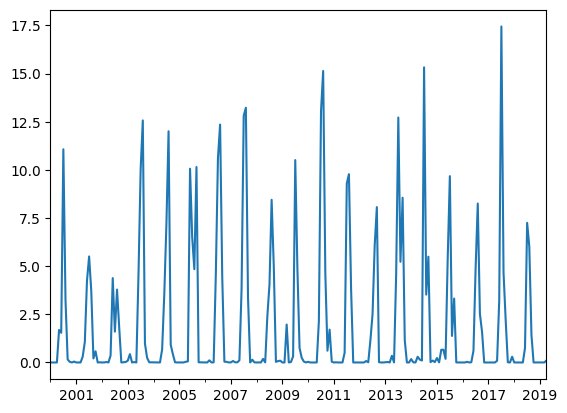

In [12]:
Train_ahm["PRECTOTCORR"].plot()


<Axes: >

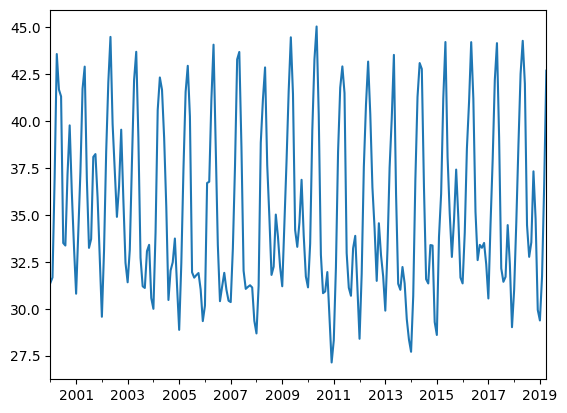

In [13]:
Train_ahm["T2M"].plot()

<Axes: >

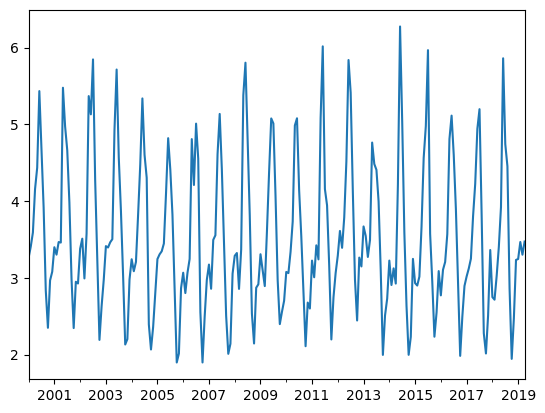

In [14]:

Train_ahm["WS10M"].plot()

In [15]:
def adfuller_test(VAR):
    result=adfuller(VAR)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ") 
def autoco_plt(VAR):
    pd.plotting.autocorrelation_plot(VAR)
    plt.show()
def ACF_PACF(VAR,lag,lag1):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(VAR,lags=lag,ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(VAR,lags=lag1,ax=ax2)
def Sarima(Variables,p,d,q,P,D,Q,s):
    model=sm.tsa.statespace.SARIMAX(Variables,order=(p,d,q),seasonal_order=(P,D,Q,s))
    result = model.fit()
    return result
def autosarima(Variable,s):
    model = pm.auto_arima(Variable, seasonal=True, m=s)
    return model
def residuals(model,data):
    Fitted = model.fittedvalues
    Residuals = data-Fitted
    return Residuals 
def Test_resid(actual,predicted):
    resid = actual - predicted
    return resid
def residAnal(resid,data):
    #resid = model.resid()
    MAD =np.mean(resid)
    MSE = np.mean(resid**2)
    RMSE = MSE**0.5
    MAPE =np.mean(np.abs(resid / data)) * 100
    a,b =shapiro(resid)
    return ["MAD:",MAD,"MSE",MSE,"RMSE",RMSE,"MAPE:",MAPE,"P_val", b]
def predict_plot(var1,var2, var3, var4):
    plt.plot(var1,label="Train")
    plt.plot(var2,label = "Test")
    plt.plot(var3,label = "Predicted")
    plt.plot(var4,label = "Prediction_Test")
    plt.legend()
    plt.show()


In [16]:
adfuller_test(Train_ahm['T2M'])
adfuller_test(Train_ahm['PRECTOTCORR'])
adfuller_test(Train_ahm['QV2M'])

ADF Test Statistic : -3.298312378868522
p-value : 0.01495407994412975
#Lags Used : 14
Number of Observations Used : 217
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -2.746763466726185
p-value : 0.0662897797636982
#Lags Used : 12
Number of Observations Used : 219
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -2.6618154169882424
p-value : 0.08088212745545575
#Lags Used : 13
Number of Observations Used : 218
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
#autoco_plt(Train_ahm["T2M"])
#autoco_plt(Train_ahm["QV2M"])
#autoco_plt(Train_ahm["PRECTOTCORR"])

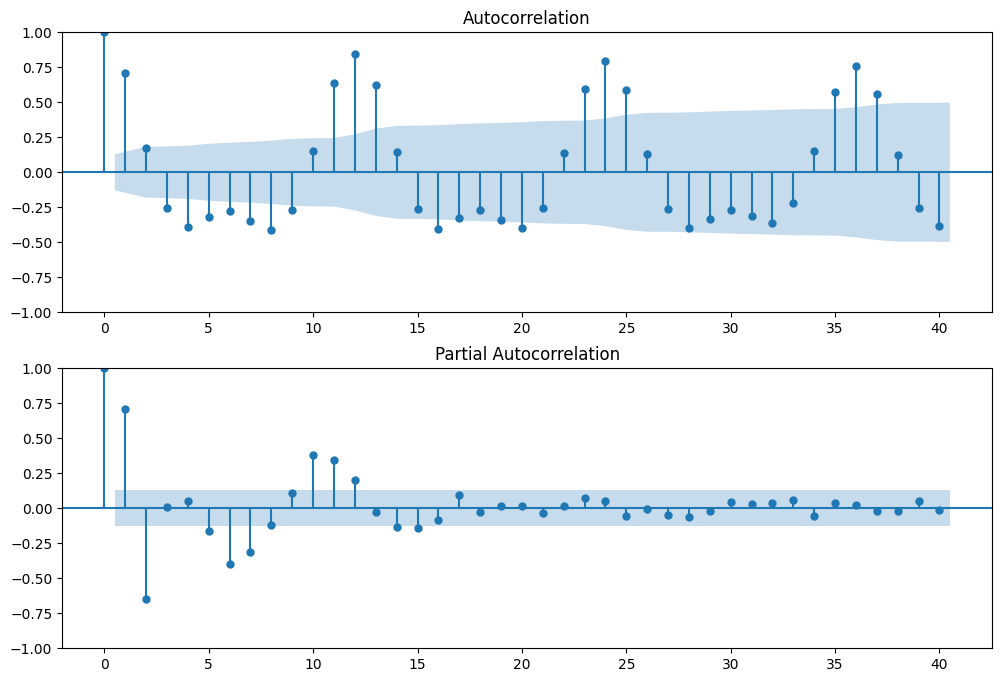

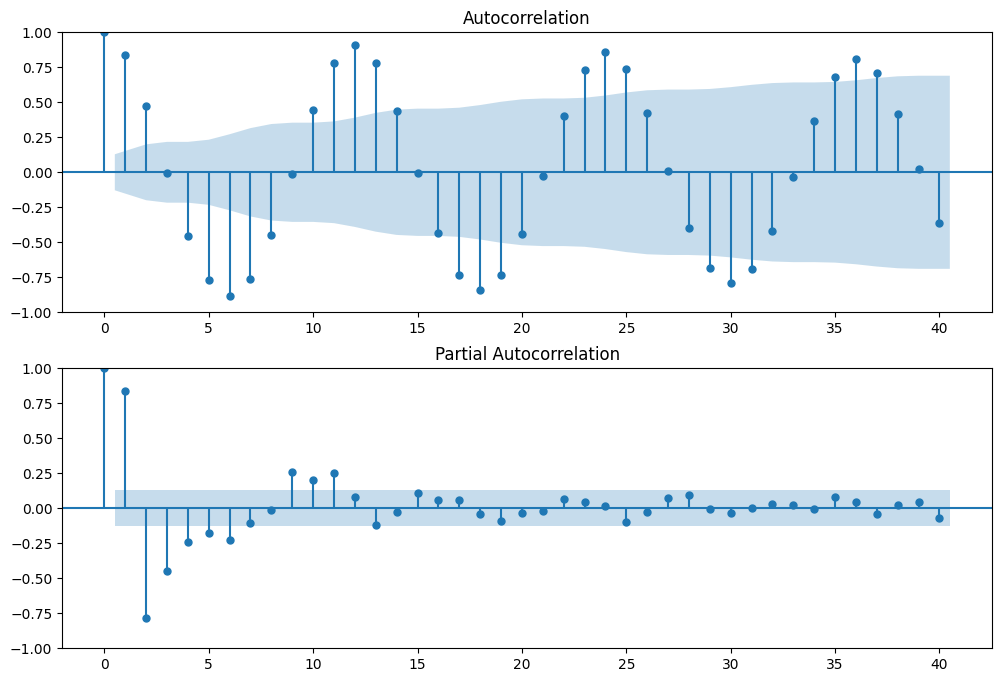

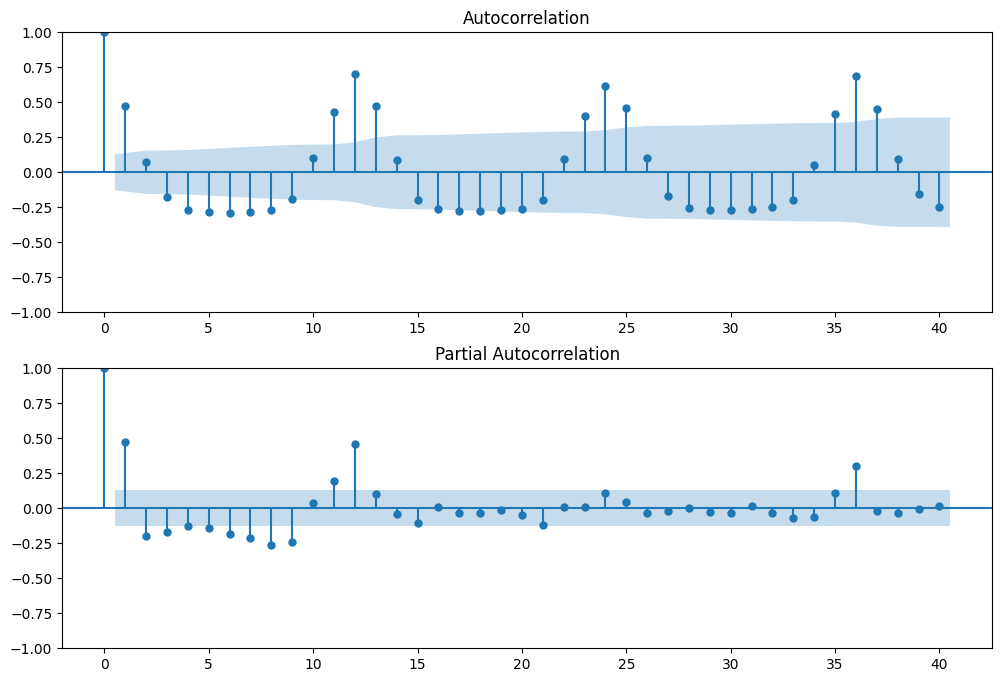

In [18]:
ACF_PACF(Train_ahm["T2M"],40,40)
ACF_PACF(Train_ahm["QV2M"],40,40)
ACF_PACF(Train_ahm["PRECTOTCORR"],40,40)

In [19]:
result = Sarima(Train_ahm["PRECTOTCORR"],2,0,0,1,0,1,12)
result1 = Sarima(Train_ahm["T2M"],1,0,1,1,0,1,12)
result2 = Sarima(Train_ahm["QV2M"],2,0,0,1,0,1,12)
#result = autosarima(Train_ahm["PRECTOTCORR"],12)
#result1 = autosarima(Train_ahm["T2M"],12)
#result2 = autosarima(Train_ahm["QV2M"],12)

C:\Users\sawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\sawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          PRECTOTCORR   No. Observations:                  232
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -514.466
Date:                              Tue, 23 Apr 2024   AIC                           1038.933
Time:                                      00:32:44   BIC                           1056.166
Sample:                                  01-01-2000   HQIC                          1045.883
                                       - 04-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0770      0.049      1.583      0.114      -0.018       0.172
ar.L2         -0.0179      0.074     -0.242      0.809      -0.163       0.127
ar.S.L12       0.9909      0.005    202.450      0.000       0.981       1.001
ma.S.L12      -0.7910      0.045    -17.602      0.000      -0.879      -0.703
sigma2         4.4690      0.237     18.859      0.000       4.005       4.933
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               321.80
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             1.34
Prob(H) (two-sided):                  0.74   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                T2M   No. Observations:                  232
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -439.423
Date:                            Tue, 23 Apr 2024   AIC                            888.846
Time:                                    00:32:47   BIC                            906.079
Sample:                                01-01-2000   HQIC                           895.796
                                     - 04-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9282      0.029     31.757      0.000       0.871       0.986
ma.L1         -0.3032      0.065     -4.668      0.000      -0.431      -0.176
ar.S.L12       0.9994      0.001   1208.617      0.000       0.998       1.001
ma.S.L12      -0.8809      0.067    -13.137      0.000      -1.012      -0.749
sigma2         2.1000      0.219      9.585      0.000       1.671       2.529
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.64   Prob(JB):                         0.94
Heteroskedasticity (H):               0.62   Skew:                            -0.01
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 QV2M   No. Observations:                  232
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -387.791
Date:                              Tue, 23 Apr 2024   AIC                            785.582
Time:                                      00:32:49   BIC                            802.816
Sample:                                  01-01-2000   HQIC                           792.532
                                       - 04-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5208      0.059      8.802      0.000       0.405       0.637
ar.L2          0.1567      0.068      2.293      0.022       0.023       0.291
ar.S.L12       0.9991      0.001   1390.893      0.000       0.998       1.001
ma.S.L12      -0.8183      0.059    -13.839      0.000      -0.934      -0.702
sigma2         1.3411      0.123     10.869      0.000       1.099       1.583
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.89   Prob(JB):                         0.15
Heteroskedasticity (H):               0.67   Skew:                             0.30
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

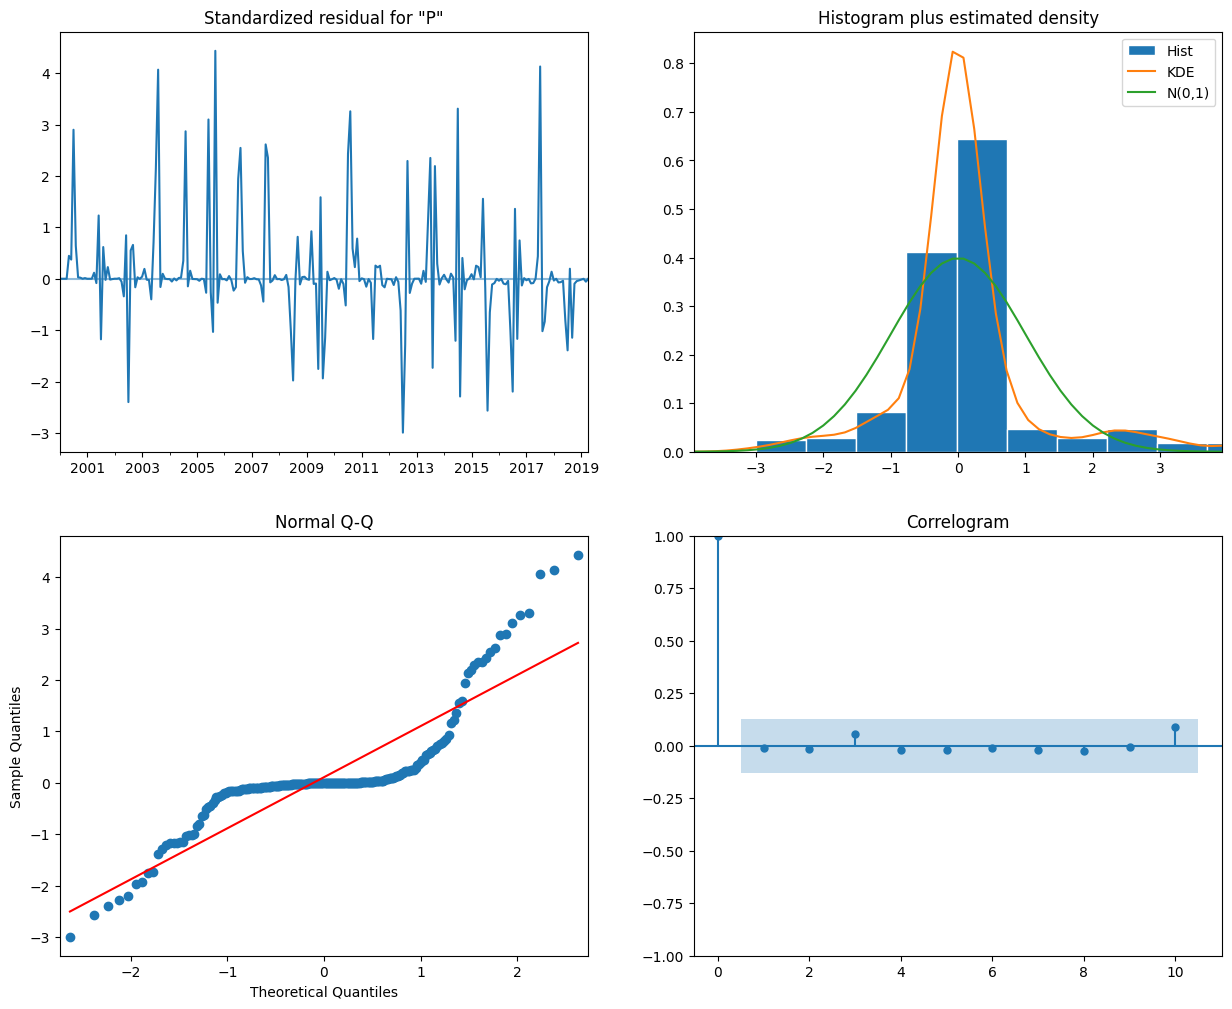

In [23]:
result.plot_diagnostics(figsize=(15,12))
plt.show() 

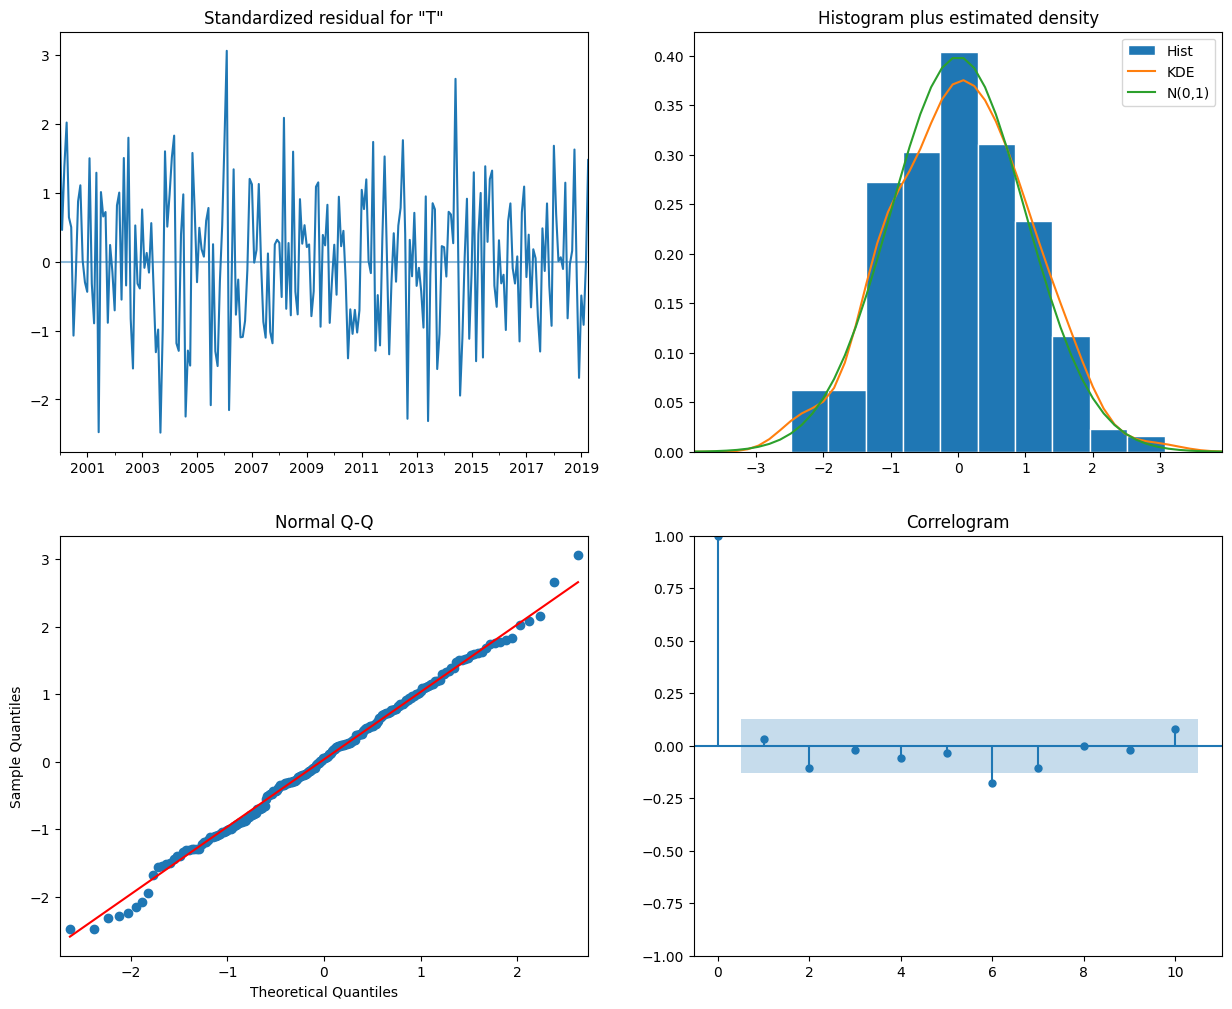

In [24]:
result1.plot_diagnostics(figsize=(15,12))
plt.show() 

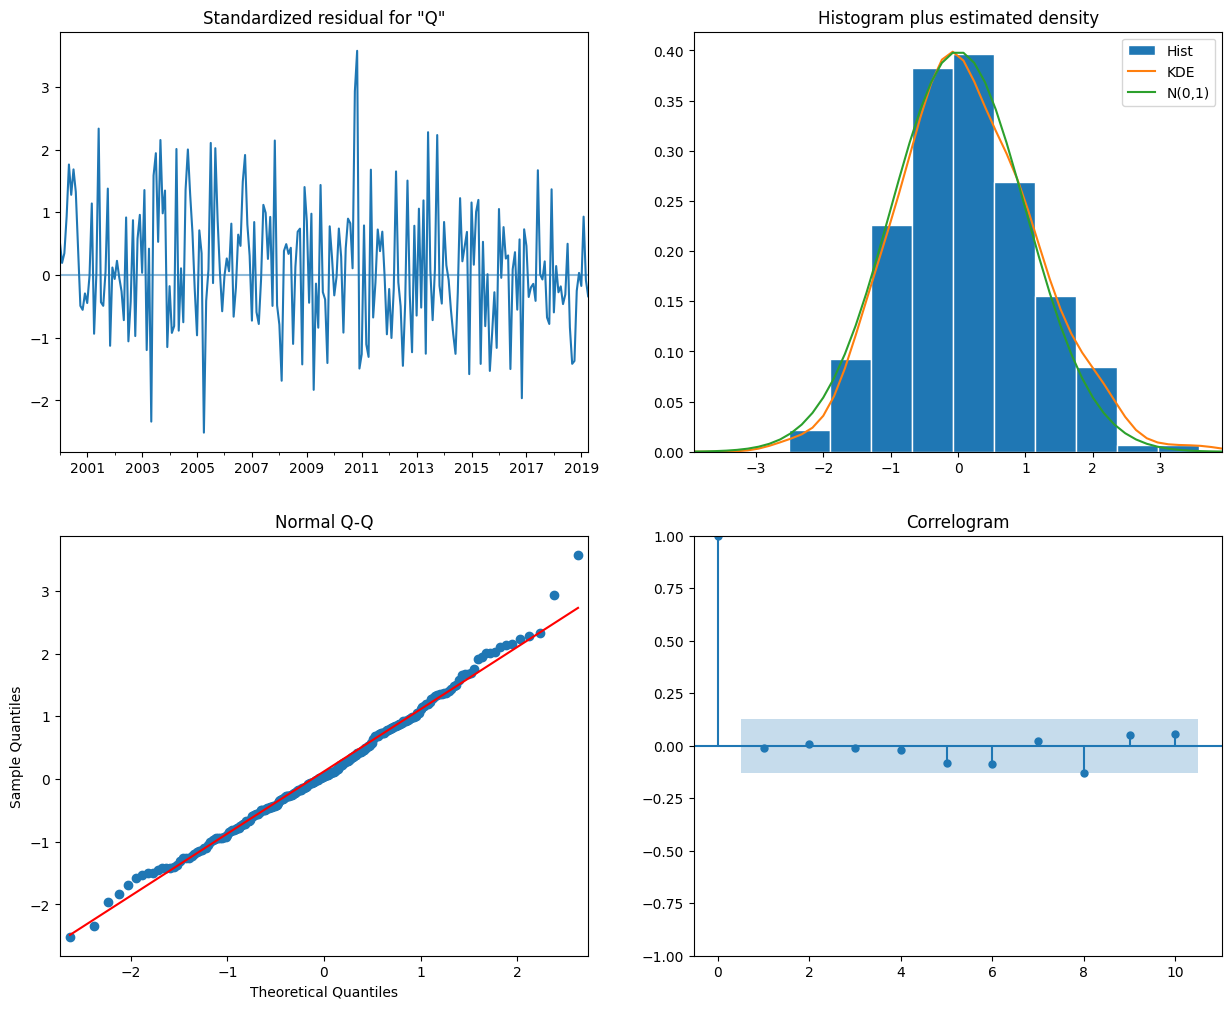

In [25]:
result2.plot_diagnostics(figsize=(15,12))
plt.show() 

In [27]:
resid2 = result2.resid
resid = result.resid
resid1 = result1.resid
std_resid = (resid - np.mean(resid)) / np.std(resid)
std_resid1 = (resid1 - np.mean(resid1)) / np.std(resid1)
std_resid2 = (resid2 - np.mean(resid2)) / np.std(resid2)

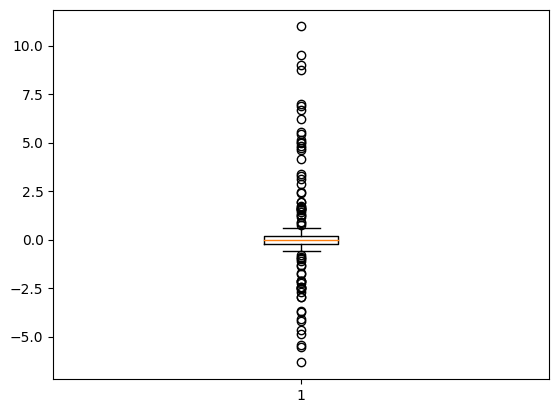

In [28]:
plt.boxplot(resid)
plt.show()


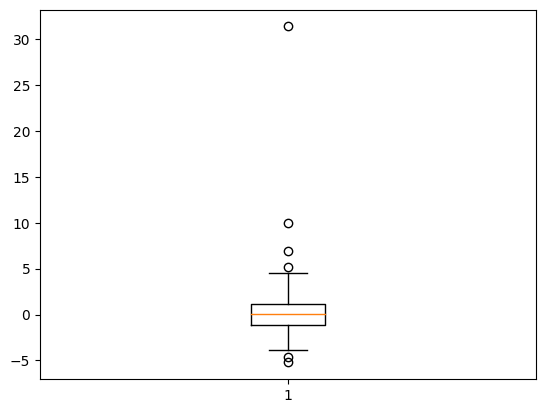

In [29]:
plt.boxplot(resid1)
plt.show()

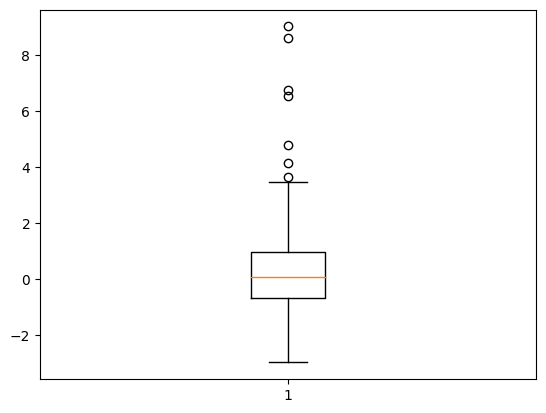

In [30]:
plt.boxplot(resid2)
plt.show()

In [31]:
#resid = residuals(result, Train_ahm["PRECTOTCORR"])
#resid1 = residuals(result1, Train_ahm["T2M"])
#resid2 = residuals(result2, Train_ahm["QV2M"])

In [32]:
#resid = residuals(result,Train_ahm["PRECTOTCORR"])
#resid1 = residuals(result1,Train_ahm["T2M"])
#resid2 = residuals(result2,Train_ahm["QV2M"])

In [33]:
residAnal(resid,Train_ahm["PRECTOTCORR"])

['MAD:',
 0.26612946247063624,
 'MSE',
 4.995126643069635,
 'RMSE',
 2.2349779961041305,
 'MAPE:',
 inf,
 'P_val',
 7.208498535317862e-19]

In [34]:
residAnal(resid1,Train_ahm["T2M"])

['MAD:',
 0.25161941875892224,
 'MSE',
 7.467761263381378,
 'RMSE',
 2.732720487605964,
 'MAPE:',
 4.215672101859607,
 'P_val',
 6.652352311024613e-23]

In [35]:
residAnal(resid2,Train_ahm["QV2M"])

['MAD:',
 0.27326634314111575,
 'MSE',
 2.670237054401745,
 'RMSE',
 1.6340859996957764,
 'MAPE:',
 13.368941104968535,
 'P_val',
 4.772318065900116e-13]

ADF Test Statistic : -14.966488684188036
p-value : 1.2178341111785585e-27
#Lags Used : 0
Number of Observations Used : 231
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -7.190289493154864
p-value : 2.5140053932593466e-10
#Lags Used : 8
Number of Observations Used : 223
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -10.427850123518613
p-value : 1.639877574912692e-18
#Lags Used : 0
Number of Observations Used : 231
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


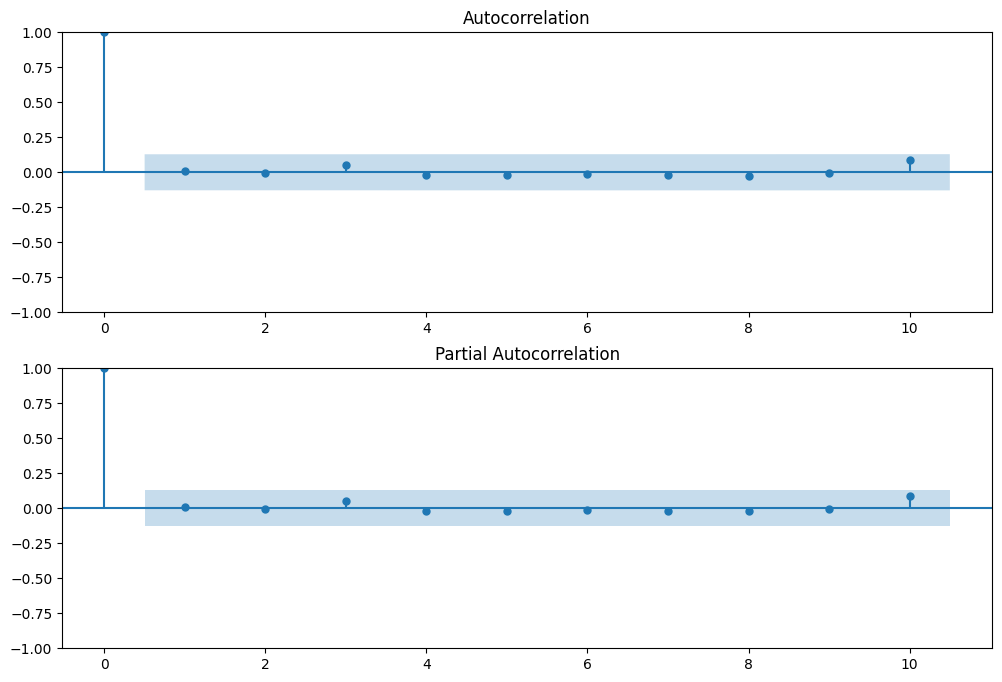

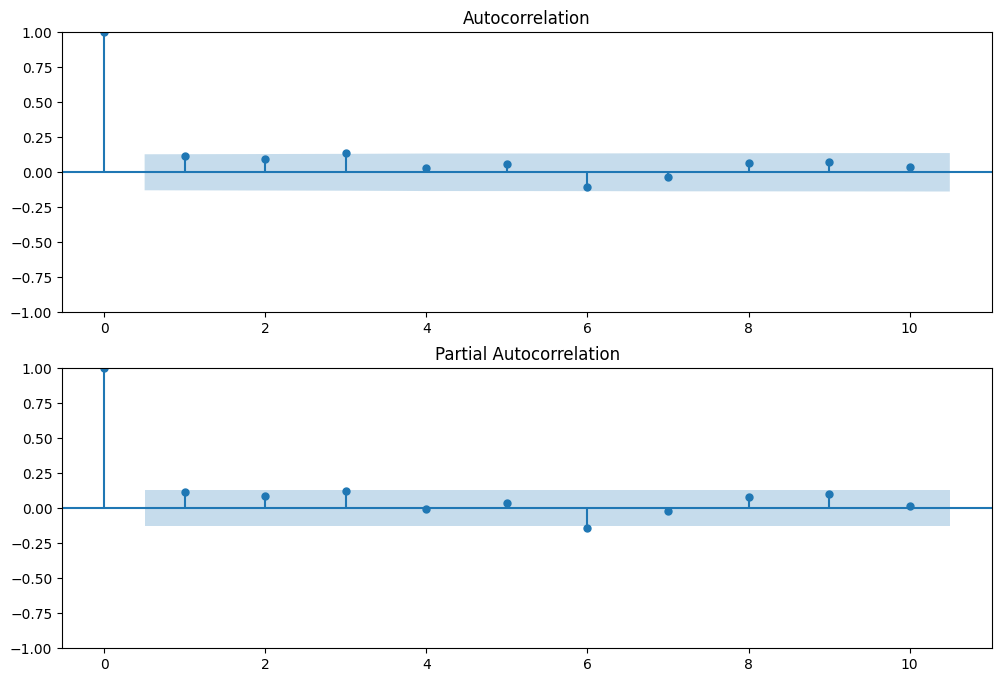

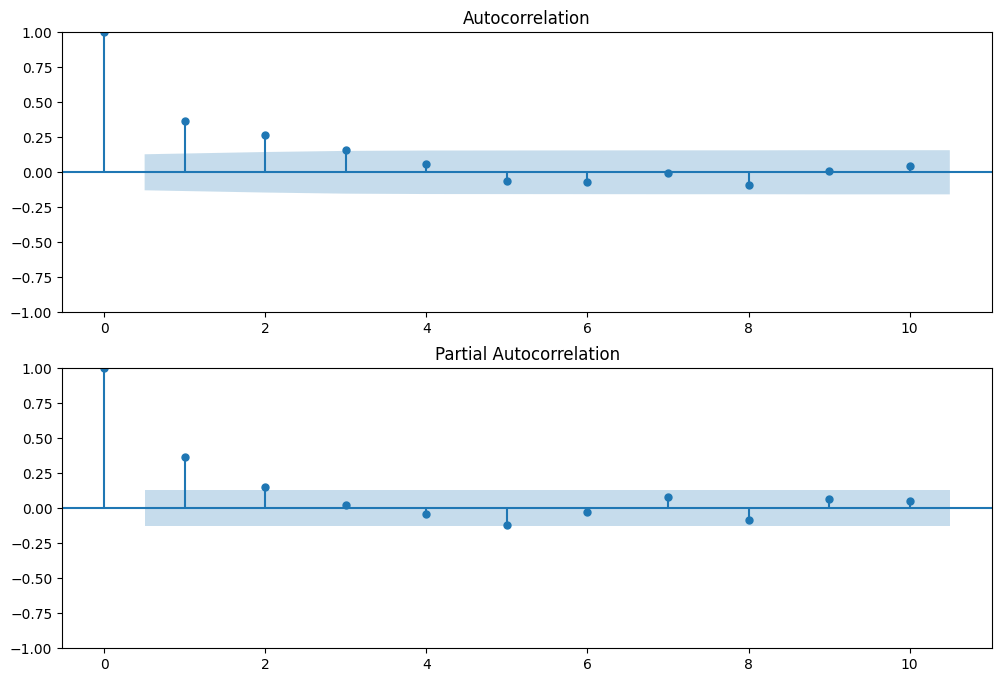

In [36]:
ACF_PACF(resid,10,10)
adfuller_test(resid)
ACF_PACF(resid1,10,10)
adfuller_test(resid1)
ACF_PACF(resid2,10,10)
adfuller_test(resid2)

In [37]:
forecast_r= result.get_forecast(steps=71)
forecast_mean_r = forecast_r.predicted_mean
forecast_ci_r = forecast_r.conf_int()

In [38]:
forecast_t= result1.get_forecast(steps=71)
forecast_mean_t = forecast_t.predicted_mean
forecast_ci_t = forecast_t.conf_int()

In [39]:
forecast_q= result2.get_forecast(steps=71)
forecast_mean_q = forecast_q.predicted_mean
forecast_ci_q = forecast_q.conf_int()

In [ ]:
Future_ahm = pd.concat([forecast_mean_r,forecast_mean_q,forecast_mean_t],axis = 1, ignore_index = True)
Future_ahm
Test_pre_ahm =Future_ahm.iloc[0:59,:]
pre_ahm = Future_ahm.tail(12)

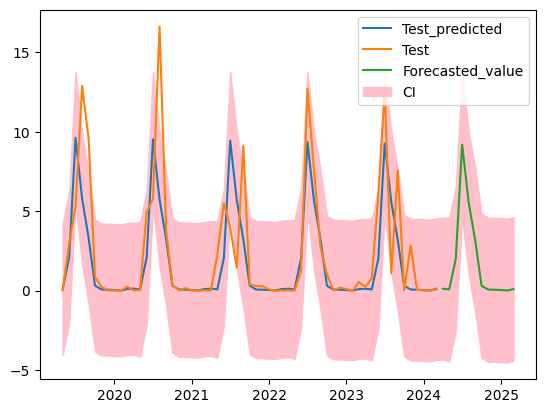

In [110]:
plt.plot(Test_pre_ahm.iloc[:,0], label = "Test_predicted")
plt.plot(Test_ahm["PRECTOTCORR"],label = "Test")
#plt.plot(Train_ahm["PRECTOTCORR"], label = "Train")
plt.plot(pre_ahm.iloc[:,0], label = "Forecasted_value")
plt.fill_between(forecast_ci_r.index, forecast_ci_r.iloc[:, 0], forecast_ci_r.iloc[:, 1], color='pink',label = "CI")
plt.legend()
plt.show()


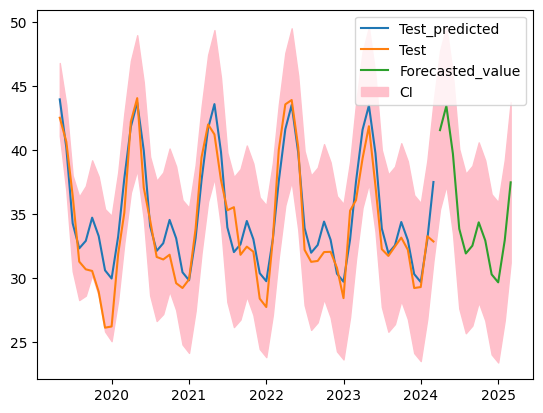

In [111]:
plt.plot(Test_pre_ahm.iloc[:,2], label = "Test_predicted")
plt.plot(Test_ahm["T2M"],label = "Test")
#plt.plot(Train_ahm["PRECTOTCORR"], label = "Train")
plt.plot(pre_ahm.iloc[:,2], label = "Forecasted_value")
plt.fill_between(forecast_ci_t.index, forecast_ci_t.iloc[:, 0], forecast_ci_t.iloc[:, 1], color='pink',label="CI")
plt.legend()
plt.show()

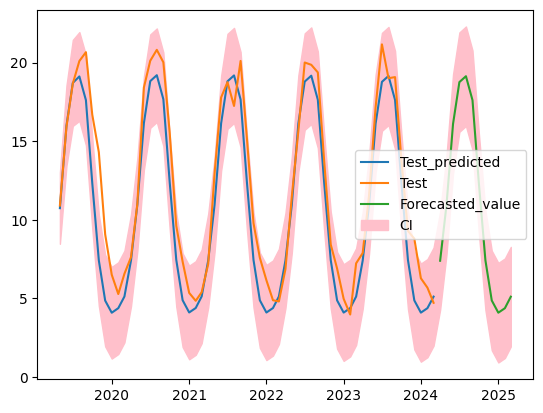

In [112]:
plt.plot(Test_pre_ahm.iloc[:,1], label = "Test_predicted")
plt.plot(Test_ahm["QV2M"],label = "Test")
#plt.plot(Train_ahm["QV2M"], label = "Train")
plt.plot(pre_ahm.iloc[:,1], label = "Forecasted_value")
plt.fill_between(forecast_ci_q.index, forecast_ci_q.iloc[:, 0], forecast_ci_q.iloc[:, 1], label = "CI" , color='pink')
plt.legend()
plt.show()

In [124]:
prot= pd.concat([forecast_mean_r,forecast_ci_r,forecast_mean_q,forecast_ci_q,forecast_mean_t,forecast_ci_t],axis = 1, ignore_index = True)
prot = prot.tail(12)
print(prot)

                   0         1          2          3          4          5  \
2024-04-01  0.112761 -4.354782   4.580303   7.387386   4.263875  10.510898   
2024-05-01  0.069434 -4.468956   4.607823  10.922162   7.770894  14.073431   
2024-06-01  2.007062 -2.531744   6.545868  16.096601  12.937729  19.255472   
2024-07-01  9.190167  4.651351  13.728983  18.759407  15.595443  21.923372   
2024-08-01  5.541328  1.002511  10.080144  19.134020  15.967477  22.300562   
2024-09-01  3.137960 -1.400857   7.676776  17.606816  14.438861  20.774771   
2024-10-01  0.295362 -4.243454   4.834178  12.331576   9.162867  15.500285   
2024-11-01  0.063039 -4.475778   4.601855   7.417787   4.248676  10.586897   
2024-12-01  0.050099 -4.488717   4.588915   4.859026   1.689707   8.028344   
2025-01-01  0.030465 -4.508323   4.569253   4.080991   0.911597   7.250385   
2025-02-01  0.006049 -4.532739   4.544837   4.364865   1.195407   7.534323   
2025-03-01  0.090480 -4.448308   4.629268   5.099492   1.930000 

In [44]:
#Test_ahm["PRECTOTCORR_FT"]=result.predict(start="2019-05-01",end="2024-03-01",dynamic=True)
#Test_ahm["T2M_FT"]=result1.predict(start="2019-05-01",end="2024-03-01",dynamic=True)
#Test_ahm["QV2M_FT"]=result2.predict(start="2019-05-01",end="2024-03-01",dynamic=True)
#Future["PRECTOTCORR"]=result.predict(start="2024-04-01",end="2025-03-01",dynamic=True)
#Future["T2M"]=result1.predict(start="2024-04-01",end="2025-03-01",dynamic=True)
#Future["QV2M"]=result2.predict(start="2024-04-01",end="2025-03-01",dynamic=True)

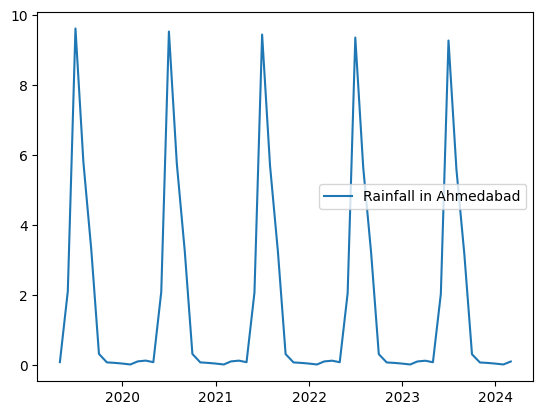

In [45]:
plt.plot(Test_pre_ahm.iloc[:,0], label = "Rainfall in Ahmedabad")
plt.legend()
plt.show()

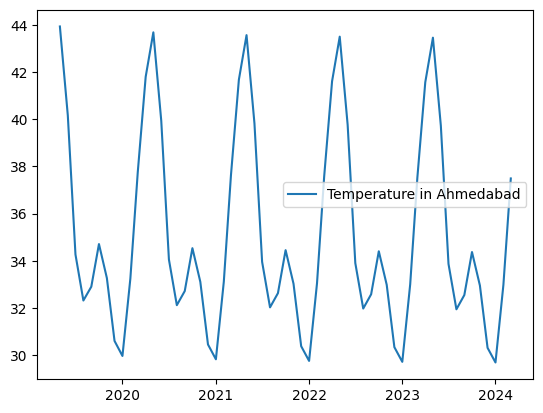

In [46]:
plt.plot(Test_pre_ahm.iloc[:,2], label = "Temperature in Ahmedabad")
plt.legend()
plt.show()

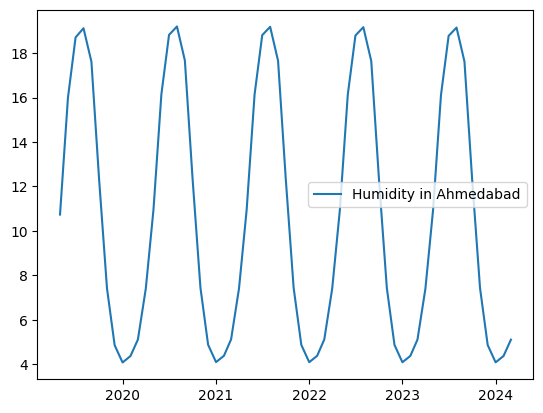

In [47]:
plt.plot(Test_pre_ahm.iloc[:,1], label = "Humidity in Ahmedabad")
plt.legend()
plt.show()

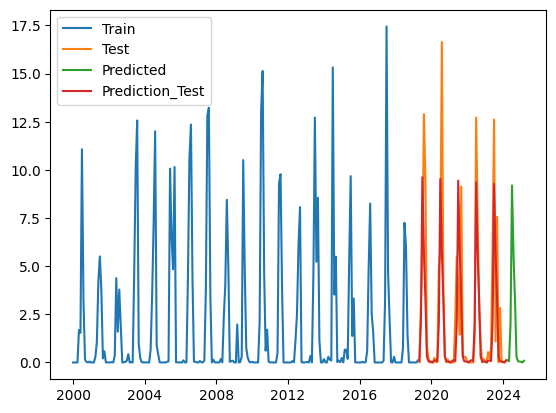

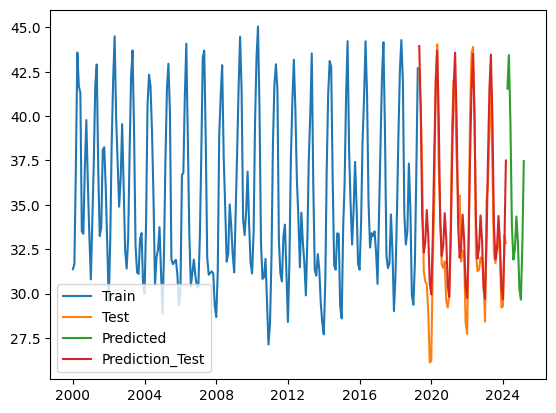

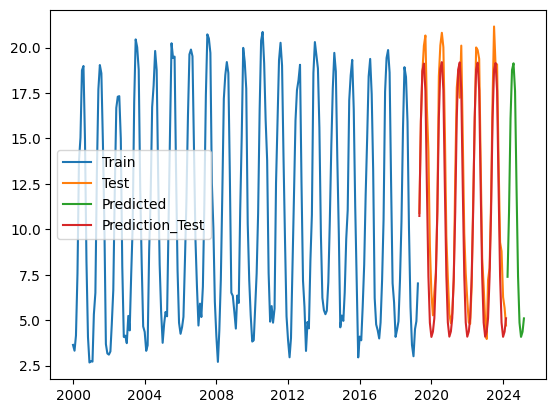

In [48]:
predict_plot(Train_ahm["PRECTOTCORR"], Test_ahm["PRECTOTCORR"],pre_ahm.iloc[:,0],Test_pre_ahm.iloc[:,0])
predict_plot(Train_ahm["T2M"], Test_ahm["T2M"],pre_ahm.iloc[:,2],Test_pre_ahm.iloc[:,2])
predict_plot(Train_ahm["QV2M"], Test_ahm["QV2M"],pre_ahm.iloc[:,1],Test_pre_ahm.iloc[:,1])

In [49]:
mumbai = pd.read_csv("D:/Project/My_Dataset/Mumbai_weather.csv")
mumbai.head()

,DATE,PS,WS10M,WS10M_MAX,WS10M_MIN,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WD50M,QV2M,PRECTOTCORR,T2M1,T2MDEW,T2MWET,TS,T2M,T2M_MIN
0,01-01-2000,100.00,3.21,5.71,0.38,140.44,4.89,8.25,0.35,136.88,9.03,0.0,23.31,12.22,17.76,23.31,32.23,16.11
1,02-01-2000,100.09,3.78,7.09,0.14,145.25,5.81,9.92,0.48,142.50,8.30,0.0,23.13,10.90,17.01,23.26,32.05,16.43
2,03-01-2000,100.02,3.62,6.87,0.55,163.06,5.64,9.59,0.73,165.00,7.45,0.0,22.48,9.09,15.78,22.72,32.20,15.26
3,04-01-2000,99.98,3.55,6.81,0.75,164.56,5.41,9.84,0.64,163.25,7.26,0.0,22.51,8.78,15.65,22.62,32.46,15.23
4,05-01-2000,100.00,3.35,6.91,0.62,155.19,5.02,9.84,0.32,154.88,6.90,0.0,22.14,8.08,15.11,21.83,31.99,15.53


In [50]:
mumbai.isnull().sum()

DATE           0
PS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WD10M          0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WD50M          0
QV2M           0
PRECTOTCORR    0
T2M1           0
T2MDEW         0
T2MWET         0
TS             0
T2M            0
T2M_MIN        0
dtype: int64

In [51]:
mumbai.describe()

,PS,WS10M,WS10M_MAX,WS10M_MIN,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WD50M,QV2M,PRECTOTCORR,T2M1,T2MDEW,T2MWET,TS,T2M,T2M_MIN
count,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000
mean,99.771917,3.567152,5.737170,1.762312,204.779506,4.929483,7.299911,2.627693,203.488619,14.472815,6.896003,26.751194,18.716533,22.733937,27.682532,32.811511,22.189262
std,0.355596,1.290358,1.629138,1.261051,60.471935,1.735741,1.872143,2.083522,61.685610,4.643675,18.239032,2.853269,5.919160,3.619925,3.868719,4.142875,3.699371
min,98.000000,1.160000,1.700000,0.020000,30.560000,1.540000,2.570000,0.010000,31.380000,2.930000,0.000000,16.580000,-4.630000,7.670000,17.340000,23.480000,9.480000
25%,99.515000,2.710000,4.640000,0.820000,158.190000,3.680000,5.980000,0.980000,155.190000,10.500000,0.000000,25.070000,14.460000,19.930000,25.300000,29.370000,19.120000
50%,99.800000,3.230000,5.680000,1.520000,215.690000,4.540000,7.020000,2.000000,215.000000,14.950000,0.010000,26.400000,20.060000,24.310000,26.710000,31.800000,23.420000
75%,100.055000,4.050000,6.620000,2.300000,251.500000,5.760000,8.510000,3.770000,251.690000,18.980000,4.170000,28.650000,24.130000,25.600000,30.395000,36.190000,25.050000
max,100.640000,14.620000,18.330000,11.170000,340.940000,18.750000,22.840000,14.790000,341.500000,23.130000,229.460000,35.240000,27.120000,28.260000,38.870000,44.910000,29.690000


In [52]:

mumbai = mumbai.drop(["DATE"],axis = 1)
start_date = datetime(2000, 1, 1)
num_days = 8831
date_list = [start_date + timedelta(days=i) for i in range(num_days)]
df = pd.DataFrame({'Date': date_list})
mumbai.insert(0, 'Date', df.Date)
mumbai.head()

,Date,PS,WS10M,WS10M_MAX,WS10M_MIN,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WD50M,QV2M,PRECTOTCORR,T2M1,T2MDEW,T2MWET,TS,T2M,T2M_MIN
0,2000-01-01,100.00,3.21,5.71,0.38,140.44,4.89,8.25,0.35,136.88,9.03,0.0,23.31,12.22,17.76,23.31,32.23,16.11
1,2000-01-02,100.09,3.78,7.09,0.14,145.25,5.81,9.92,0.48,142.50,8.30,0.0,23.13,10.90,17.01,23.26,32.05,16.43
2,2000-01-03,100.02,3.62,6.87,0.55,163.06,5.64,9.59,0.73,165.00,7.45,0.0,22.48,9.09,15.78,22.72,32.20,15.26
3,2000-01-04,99.98,3.55,6.81,0.75,164.56,5.41,9.84,0.64,163.25,7.26,0.0,22.51,8.78,15.65,22.62,32.46,15.23
4,2000-01-05,100.00,3.35,6.91,0.62,155.19,5.02,9.84,0.32,154.88,6.90,0.0,22.14,8.08,15.11,21.83,31.99,15.53


In [53]:
mumbai['Date'] = pd.to_datetime(mumbai['Date'])
mumbai['Month'] = mumbai['Date'].dt.to_period('M')
by_month = mumbai.groupby('Month')[["PRECTOTCORR","T2M","QV2M","PS","WS10M"]].mean().reset_index()
by_month.head()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
0,2000-01,0.000000,33.047742,8.014516,100.099355,3.347742
1,2000-02,0.003793,32.810345,8.794483,99.983793,3.056552
2,2000-03,0.000323,37.193871,8.495806,99.861290,3.041290
3,2000-04,0.000333,39.728333,13.737333,99.611667,3.227333
4,2000-05,8.709355,34.601290,17.379355,99.544839,3.908710


In [54]:
split = int(len(by_month["T2M"])*0.8)
Train_mum = by_month.iloc[: split, :]
Test_mum = by_month.iloc[split : , :]
Train_mum.tail()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
227,2018-12,0.006129,32.231290,7.978387,100.210000,3.346452
228,2019-01,0.008710,33.260968,5.719032,100.305806,3.370968
229,2019-02,0.009286,34.697500,7.466071,100.206429,3.259643
230,2019-03,0.021290,37.604194,9.057419,100.018710,3.078387
231,2019-04,0.121667,40.002000,13.042667,99.771000,3.014667


In [55]:
Train_mum.drop(["Month"],axis = 1)
start_date = '2000-01-01'
end_date = '2019-04-01'
Month = pd.date_range(start=start_date, end=end_date, freq='MS') 
Train_mum.set_index(Month,inplace = True)
Test_mum.tail()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
286,2023-11,0.365667,31.900000,14.682667,100.069667,3.114333
287,2023-12,0.014194,32.604516,11.797097,100.138065,3.026452
288,2024-01,0.067742,33.041290,9.146129,100.220323,3.061935
289,2024-02,0.002069,36.230345,8.470690,100.218621,3.095517
290,2024-03,0.000000,38.270000,13.120000,100.060000,2.370000


In [56]:
Test_mum.drop(["Month"],axis = 1)
start_date = '2019-05-01'
end_date = '2024-03-01'
Month = pd.date_range(start=start_date, end=end_date, freq='MS') 
Test_mum.set_index(Month,inplace = True)
Test_mum.tail()

,Month,PRECTOTCORR,T2M,QV2M,PS,WS10M
2023-11-01,2023-11,0.365667,31.900000,14.682667,100.069667,3.114333
2023-12-01,2023-12,0.014194,32.604516,11.797097,100.138065,3.026452
2024-01-01,2024-01,0.067742,33.041290,9.146129,100.220323,3.061935
2024-02-01,2024-02,0.002069,36.230345,8.470690,100.218621,3.095517
2024-03-01,2024-03,0.000000,38.270000,13.120000,100.060000,2.370000


In [57]:

#start_date = '2024-04-01'
#end_date = '2025-01-01' 
#Month = pd.date_range(start=start_date,end=end_date,freq="MS")
#Rain_Ft1 =  pd.DataFrame(index=Month, columns=[["PRECTOTCORR","T2M","QV2M","PS","WS10M"]], data=np.nan)
#Rain_Ft1.head()


In [58]:

mumbai.set_index(mumbai["Date"],inplace = True)
mumbai.head()


,Date,PS,WS10M,WS10M_MAX,WS10M_MIN,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WD50M,QV2M,PRECTOTCORR,T2M1,T2MDEW,T2MWET,TS,T2M,T2M_MIN,Month
Date,,,,,,,,,,,,,,,,,,,
2000-01-01,2000-01-01,100.00,3.21,5.71,0.38,140.44,4.89,8.25,0.35,136.88,9.03,0.0,23.31,12.22,17.76,23.31,32.23,16.11,2000-01
2000-01-02,2000-01-02,100.09,3.78,7.09,0.14,145.25,5.81,9.92,0.48,142.50,8.30,0.0,23.13,10.90,17.01,23.26,32.05,16.43,2000-01
2000-01-03,2000-01-03,100.02,3.62,6.87,0.55,163.06,5.64,9.59,0.73,165.00,7.45,0.0,22.48,9.09,15.78,22.72,32.20,15.26,2000-01
2000-01-04,2000-01-04,99.98,3.55,6.81,0.75,164.56,5.41,9.84,0.64,163.25,7.26,0.0,22.51,8.78,15.65,22.62,32.46,15.23,2000-01
2000-01-05,2000-01-05,100.00,3.35,6.91,0.62,155.19,5.02,9.84,0.32,154.88,6.90,0.0,22.14,8.08,15.11,21.83,31.99,15.53,2000-01


In [59]:

#Train_mum[["PRECTOTCORR","T2M","QV2M","PS","WS10M"]].plot()


<Axes: >

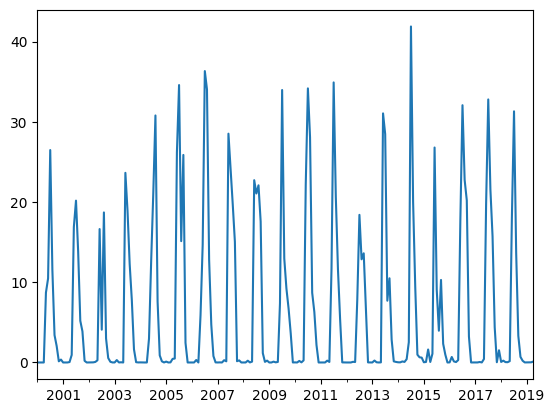

In [60]:
Train_mum["PRECTOTCORR"].plot()


<Axes: >

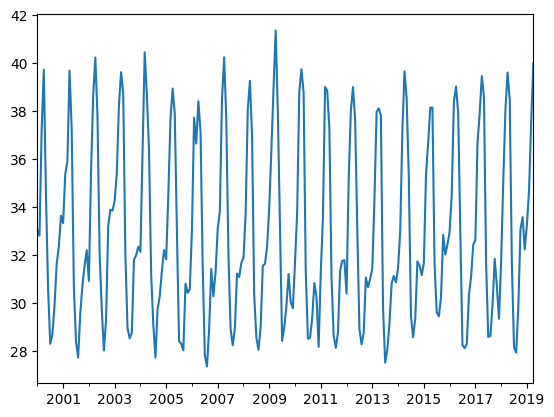

In [61]:
Train_mum["T2M"].plot()


<Axes: >

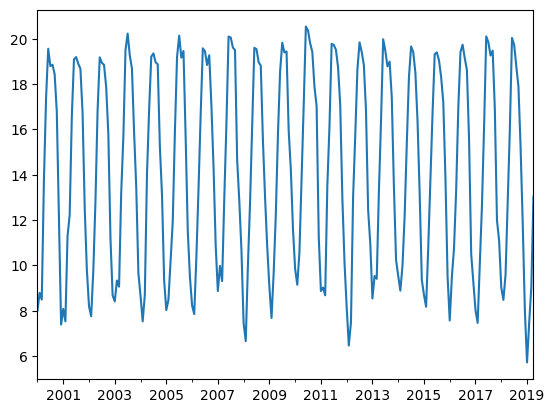

In [62]:
Train_mum["QV2M"].plot()

In [63]:

adfuller_test(Train_mum['T2M'])
adfuller_test(Train_mum['PRECTOTCORR'])
adfuller_test(Train_mum['QV2M'])

ADF Test Statistic : -3.081561671283047
p-value : 0.027948141488813846
#Lags Used : 13
Number of Observations Used : 218
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -2.4003767218732666
p-value : 0.14163010995327036
#Lags Used : 12
Number of Observations Used : 219
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -3.4396275233399445
p-value : 0.009679906041967721
#Lags Used : 15
Number of Observations Used : 216
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [64]:
#autoco_plt(Train_mum["T2M"])
#autoco_plt(Train_mum["QV2M"])
#autoco_plt(Train_mum["PRECTOTCORR"])

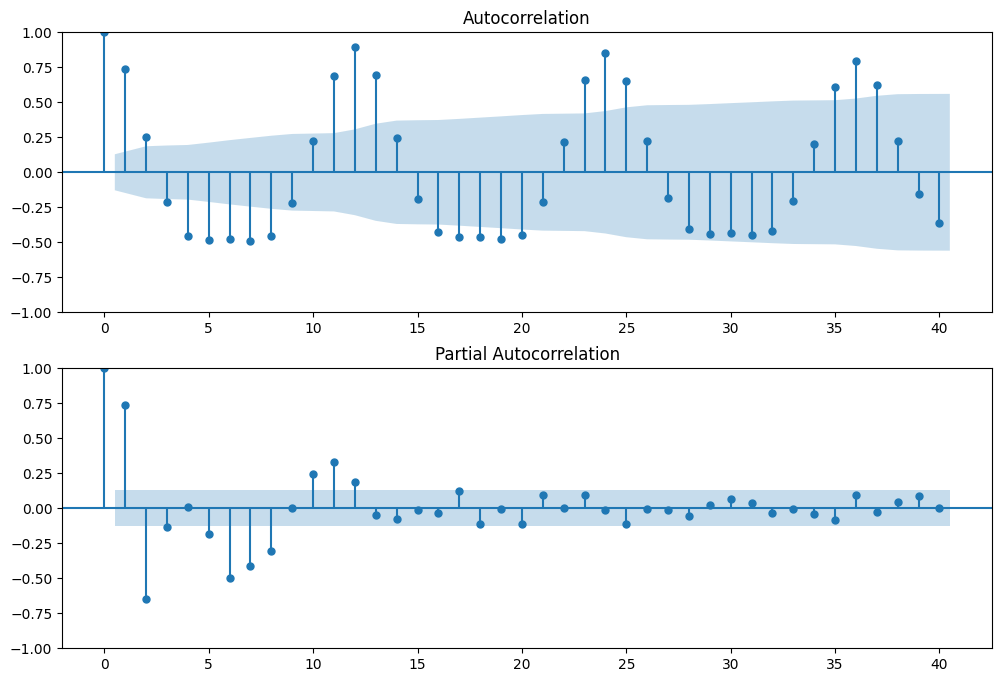

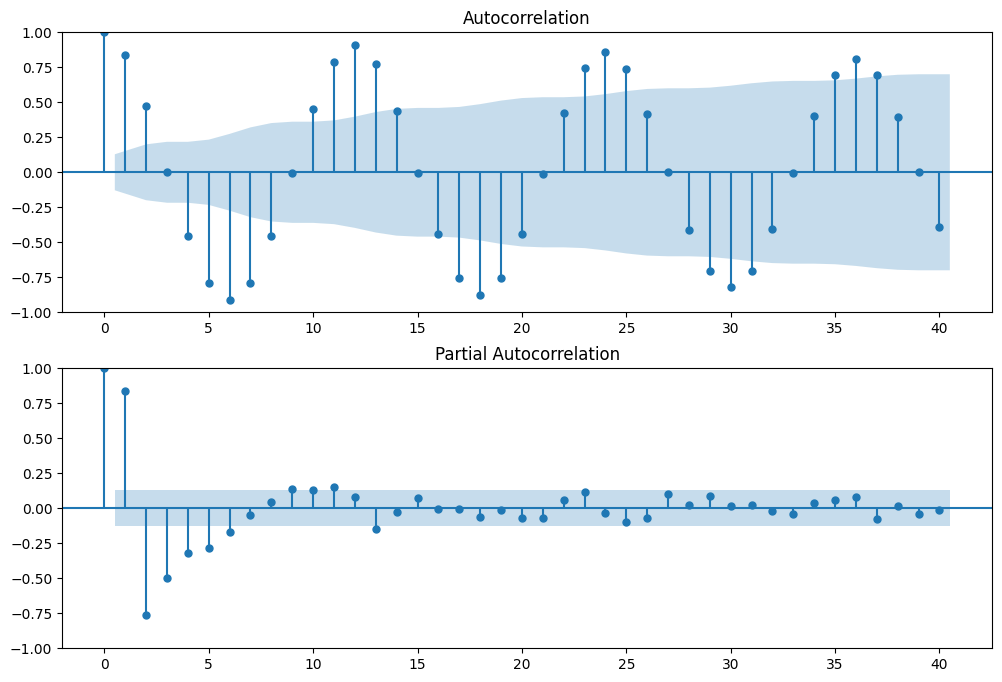

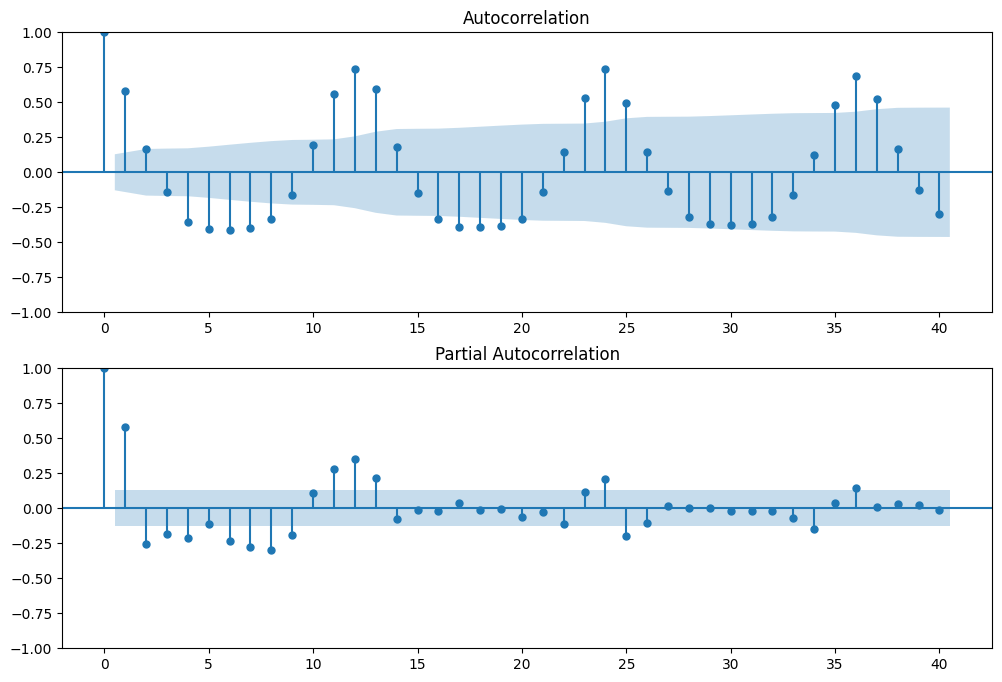

In [65]:
ACF_PACF(Train_mum["T2M"],40,40)
ACF_PACF(Train_mum["QV2M"],40,40)
ACF_PACF(Train_mum["PRECTOTCORR"],40,40)

In [66]:
results = Sarima(Train_mum["PRECTOTCORR"],2,0,0,2,0,1,12)
results1 = Sarima(Train_mum["T2M"],2,0,1,2,0,1,12)
results2 = Sarima(Train_mum["QV2M"],2,0,0,1,0,1,12)
#results = autosarima(by_month["PRECTOTCORR"],12)
#results1 = autosarima(Train_mum["T2M"],12)
#results2 = autosarima(Train_mum["QV2M"],12)

C:\Users\sawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\sawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
#resids = residuals(results, Train_mum["PRECTOTCORR"])
#resids1 = residuals(results1, Train_mum["T2M"])
#resids2 = residuals(results2, Train_mum["QV2M"])

In [70]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          PRECTOTCORR   No. Observations:                  232
Model:             SARIMAX(2, 0, 0)x(2, 0, [1], 12)   Log Likelihood                -708.847
Date:                              Tue, 23 Apr 2024   AIC                           1429.694
Time:                                      00:35:36   BIC                           1450.375
Sample:                                  01-01-2000   HQIC                          1438.034
                                       - 04-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1381      0.043      3.214      0.001       0.054       0.222
ar.L2          0.0825      0.051      1.627      0.104      -0.017       0.182
ar.S.L12       0.7708      0.051     15.221      0.000       0.672       0.870
ar.S.L24       0.2251      0.050      4.531      0.000       0.128       0.322
ma.S.L12      -0.8049      0.043    -18.574      0.000      -0.890      -0.720
sigma2        22.8360      1.219     18.730      0.000      20.446      25.226
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               235.61
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.57
Prob(H) (two-sided):                  0.91   Kurtosis:                         7.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                T2M   No. Observations:                  232
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood                -342.856
Date:                            Tue, 23 Apr 2024   AIC                            699.712
Time:                                    00:35:38   BIC                            723.839
Sample:                                01-01-2000   HQIC                           709.442
                                     - 04-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3597      0.040     33.696      0.000       1.281       1.439
ar.L2         -0.3622      0.041     -8.819      0.000      -0.443      -0.282
ma.L1         -0.9474      0.031    -30.816      0.000      -1.008      -0.887
ar.S.L12       0.8767      0.036     24.381      0.000       0.806       0.947
ar.S.L24       0.1225      0.036      3.434      0.001       0.053       0.192
ma.S.L12      -0.8563      0.073    -11.718      0.000      -1.000      -0.713
sigma2         0.9005      0.074     12.180      0.000       0.756       1.045
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.45
Prob(Q):                              0.96   Prob(JB):                         0.07
Heteroskedasticity (H):               0.62   Skew:                             0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 QV2M   No. Observations:                  232
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -312.972
Date:                              Tue, 23 Apr 2024   AIC                            635.944
Time:                                      00:35:41   BIC                            653.177
Sample:                                  01-01-2000   HQIC                           642.894
                                       - 04-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4132      0.058      7.064      0.000       0.299       0.528
ar.L2          0.1866      0.075      2.486      0.013       0.039       0.334
ar.S.L12       0.9996      0.000   3175.734      0.000       0.999       1.000
ma.S.L12      -0.8069      0.052    -15.482      0.000      -0.909      -0.705
sigma2         0.6719      0.055     12.134      0.000       0.563       0.780
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.77   Prob(JB):                         0.11
Heteroskedasticity (H):               0.84   Skew:                             0.03
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
#resids2 = results2.resid()
#resids = results.resid()
#resids1 = results1.resid()

In [74]:
resids = residuals(results,Train_mum["PRECTOTCORR"])
resids1 = residuals(results1,Train_mum["T2M"])
resids2 = residuals(results2,Train_mum["QV2M"])

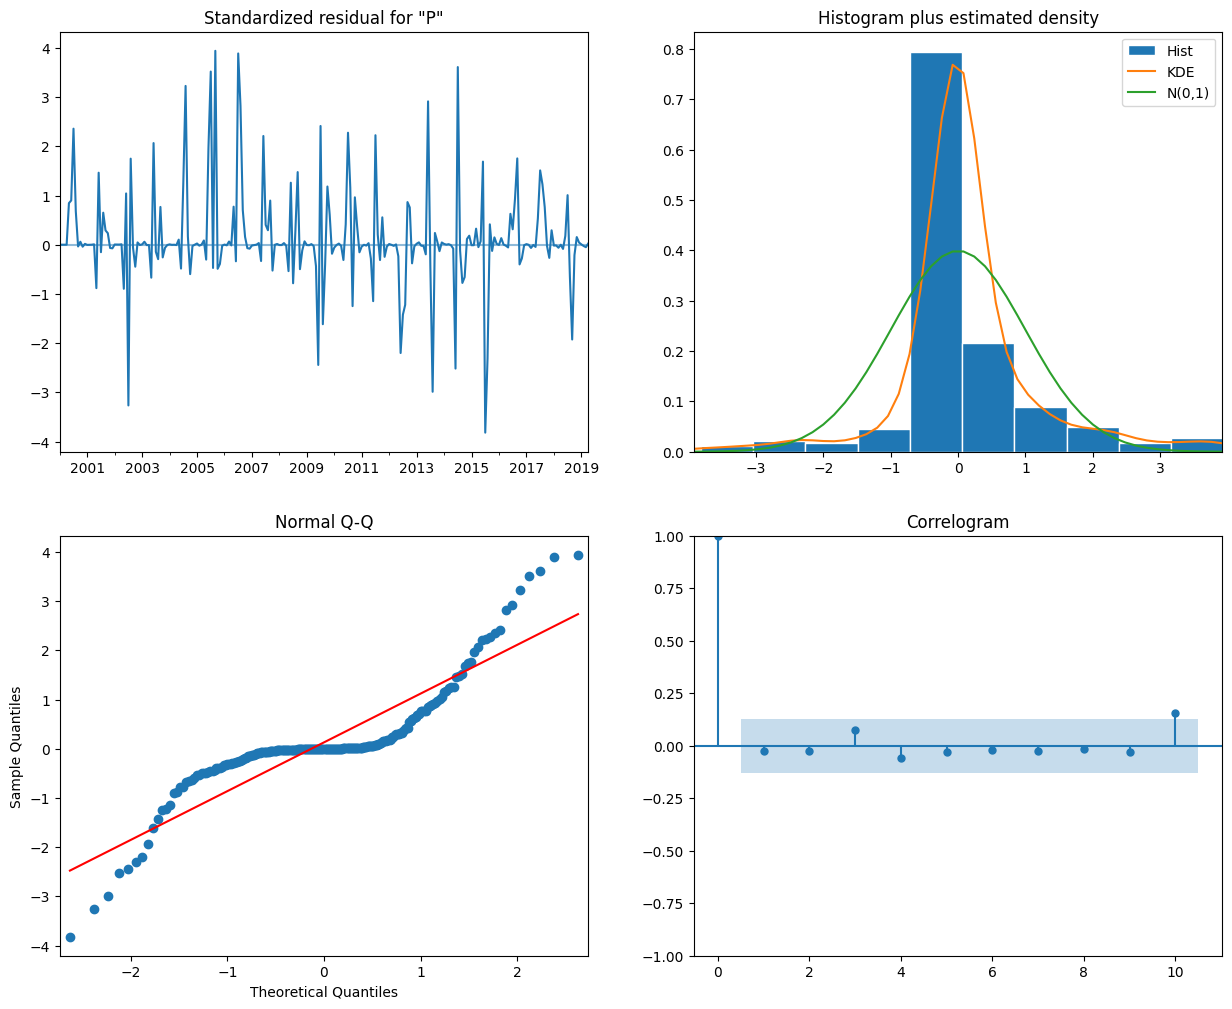

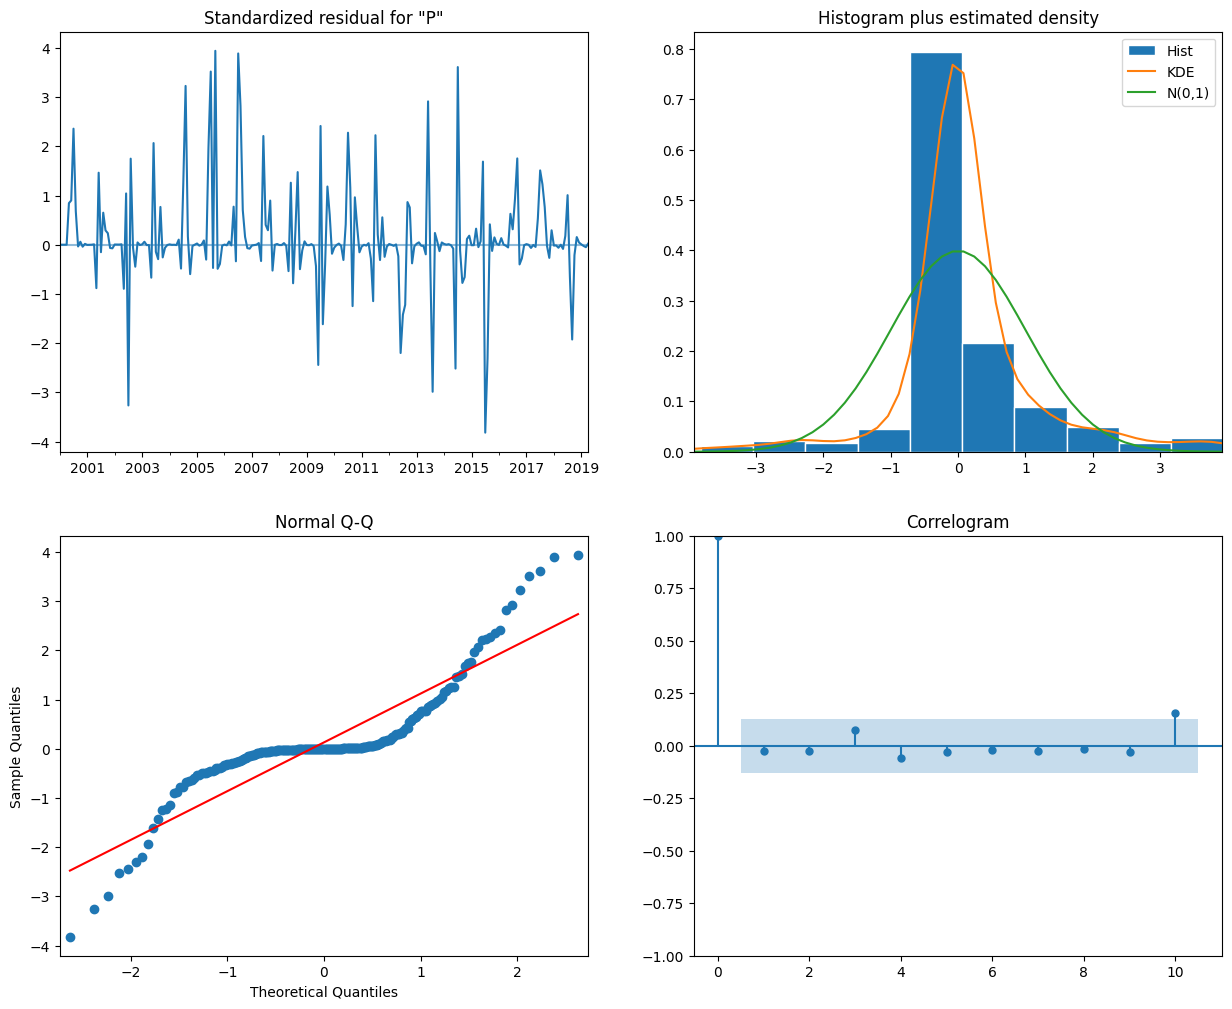

In [75]:
results.plot_diagnostics(figsize = (15,12))

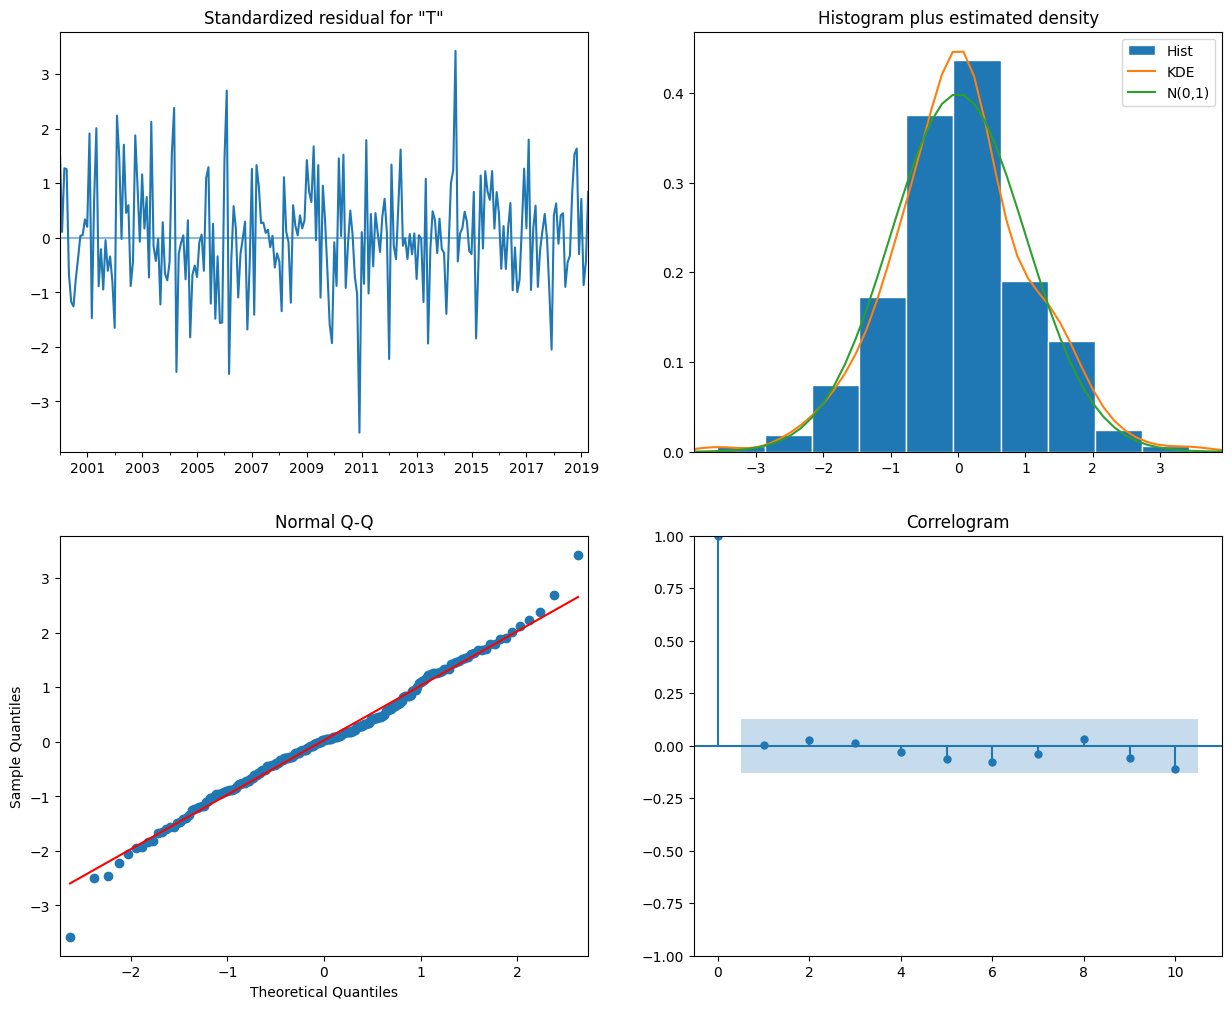

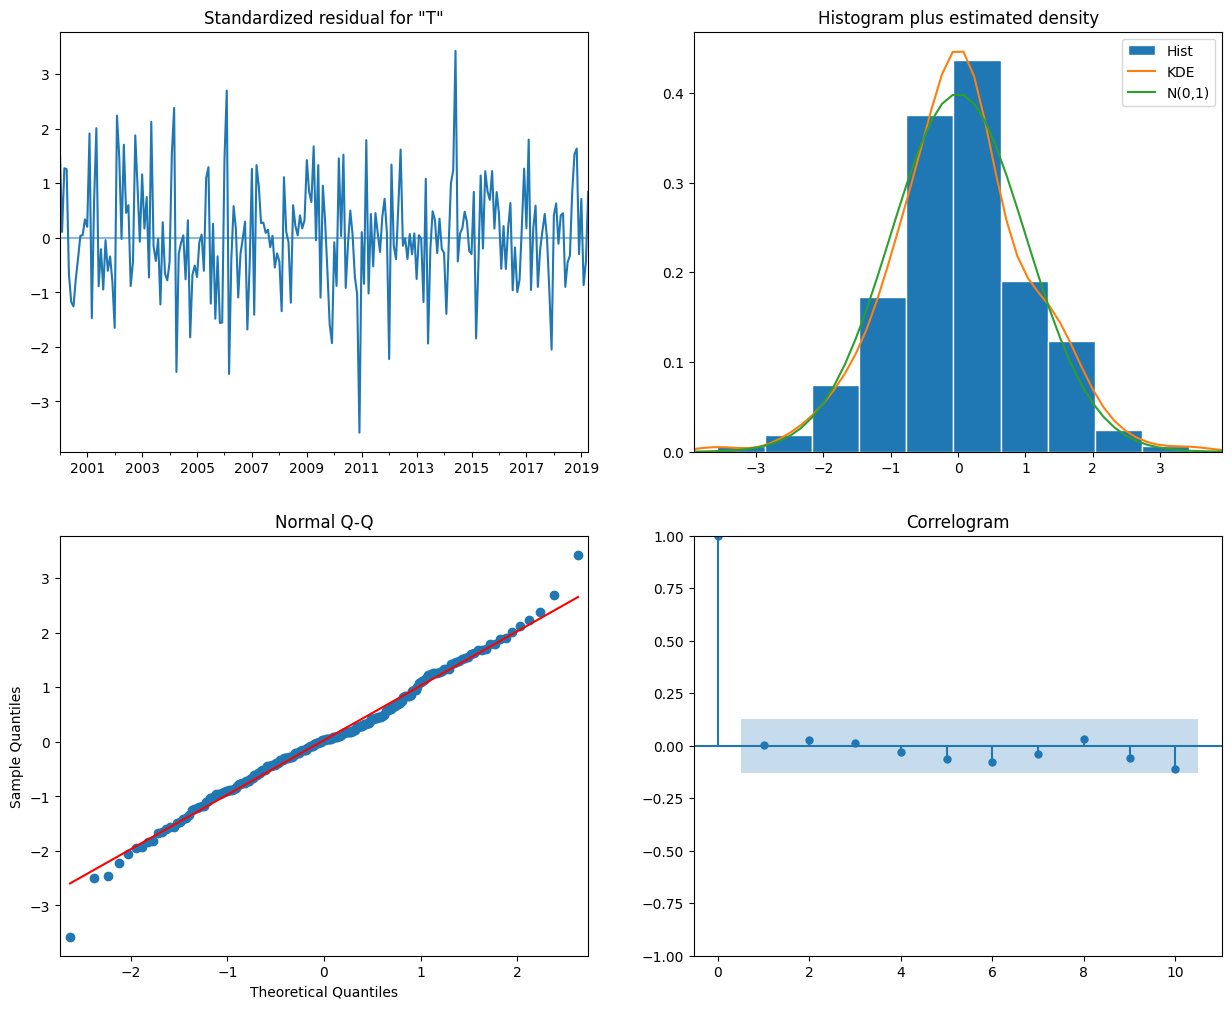

In [76]:
results1.plot_diagnostics(figsize=(15,12))

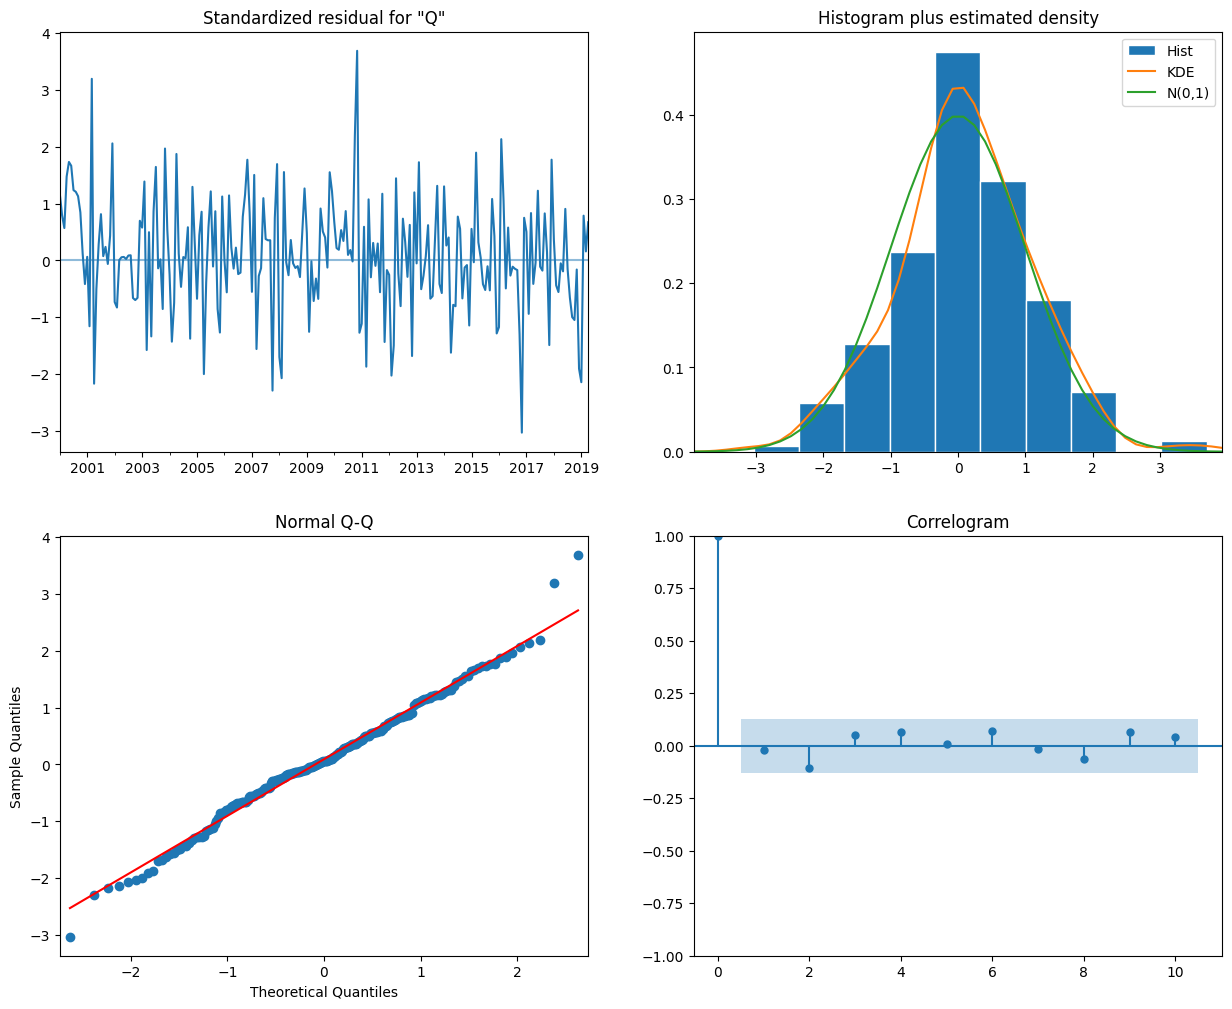

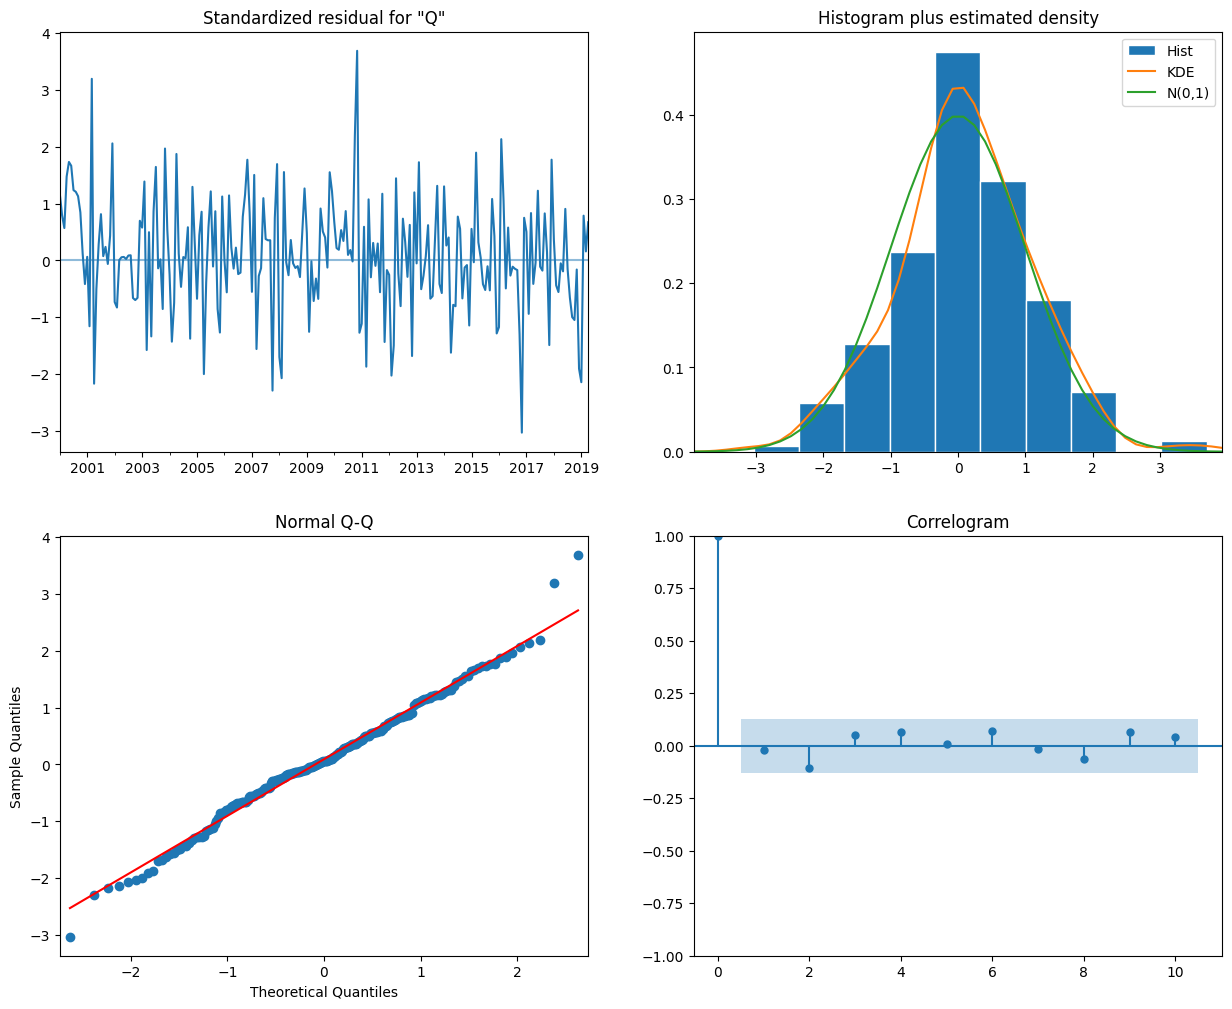

In [77]:
results2.plot_diagnostics(figsize = (15,12))

{'whiskers': [<matplotlib.lines.Line2D at 0x282d2703810>,
 'caps': [<matplotlib.lines.Line2D at 0x282dc4a3b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x282dc4a22d0>],
 'medians': [<matplotlib.lines.Line2D at 0x282dc4b0ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x282dc4a3290>],
 'means': []}

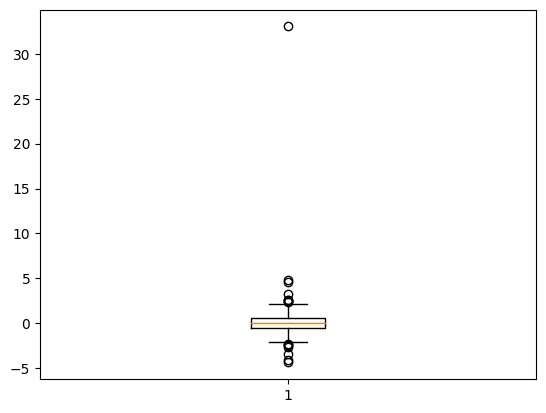

In [79]:
plt.boxplot(resids1)

{'whiskers': [<matplotlib.lines.Line2D at 0x282dc4fe550>,
 'caps': [<matplotlib.lines.Line2D at 0x282dc50f4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x282dc50da10>],
 'medians': [<matplotlib.lines.Line2D at 0x282dc51c610>],
 'fliers': [<matplotlib.lines.Line2D at 0x282dc4c4d90>],
 'means': []}

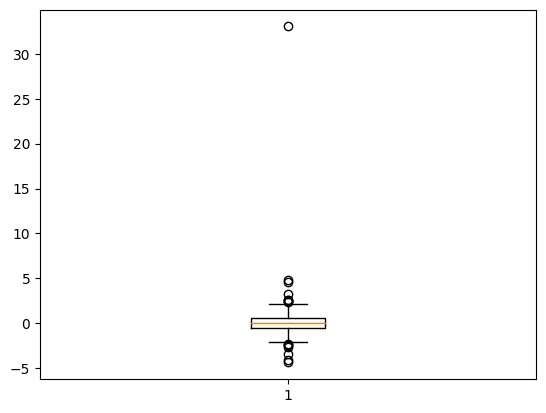

In [80]:
plt.boxplot(resids1)


{'whiskers': [<matplotlib.lines.Line2D at 0x282d2aadfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x282d2aaef90>,
 'boxes': [<matplotlib.lines.Line2D at 0x282d2aad7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x282d2abc1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x282d2703dd0>],
 'means': []}

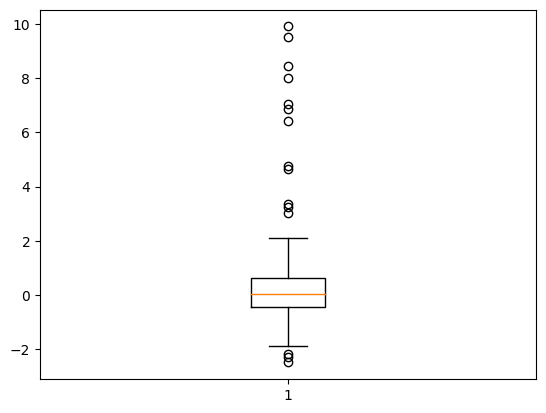

In [81]:
plt.boxplot(resids2)

ADF Test Statistic : -14.845273721608809
p-value : 1.8113099318869937e-27
#Lags Used : 0
Number of Observations Used : 231
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -30.539849367245083
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 231
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -5.700535166617089
p-value : 7.694455192399386e-07
#Lags Used : 1
Number of Observations Used : 230
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


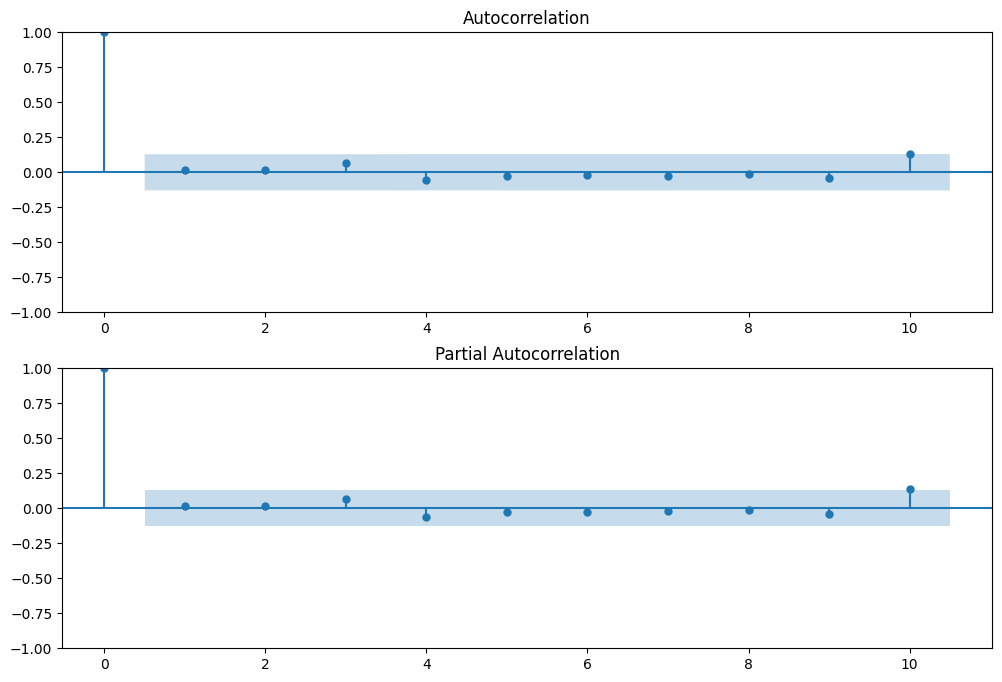

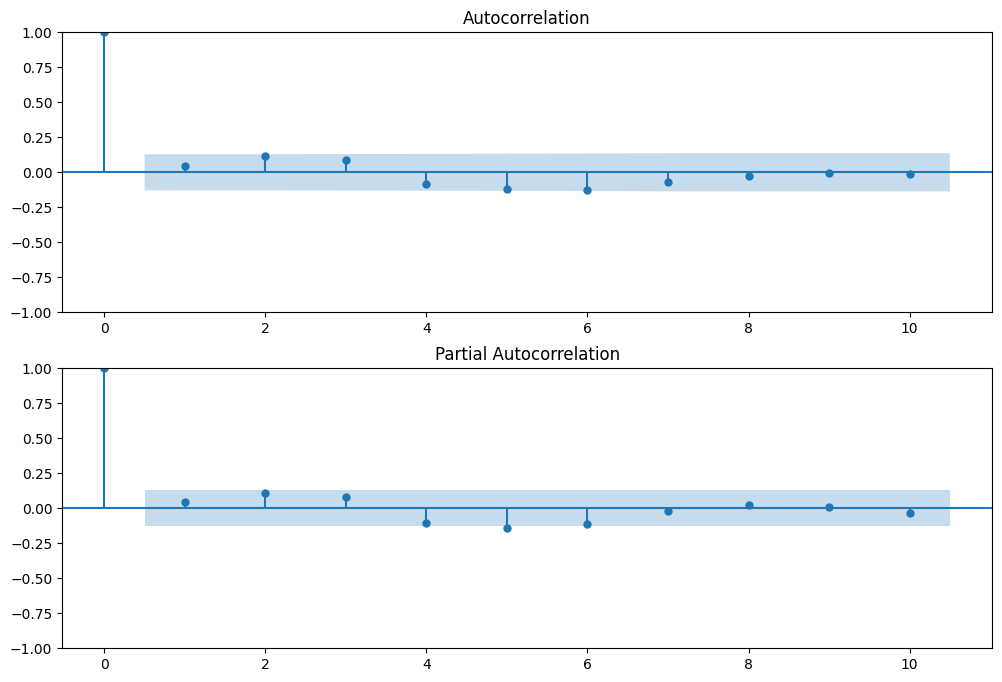

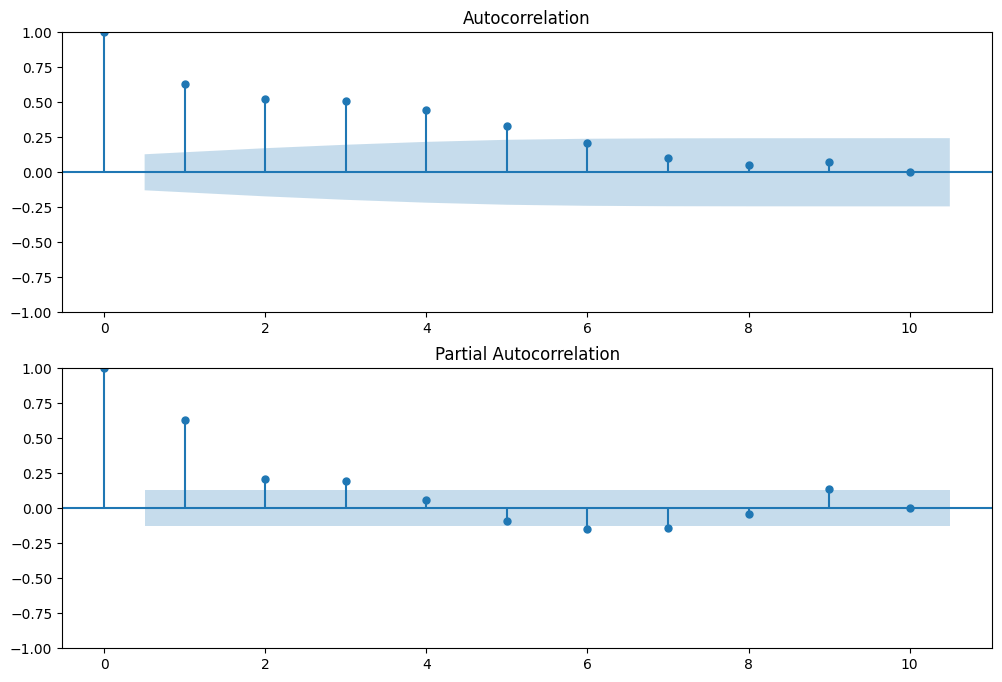

In [82]:
ACF_PACF(resids,10,10)
adfuller_test(resids)
ACF_PACF(resids1,10,10)
adfuller_test(resids1)
ACF_PACF(resids2,10,10)
adfuller_test(resids2)

In [83]:
residAnal(resids, Train_mum["PRECTOTCORR"])


['MAD:',
 0.7489500073955964,
 'MSE',
 26.801760246599,
 'RMSE',
 5.177041650073814,
 'MAPE:',
 inf,
 'P_val',
 7.842801804847205e-17]

In [84]:
residAnal(resids1, Train_mum["T2M"])


['MAD:',
 0.1553709583413541,
 'MSE',
 6.072095475214382,
 'RMSE',
 2.4641622258314047,
 'MAPE:',
 2.91976233984195,
 'P_val',
 3.2876259707571764e-27]

In [85]:
residAnal(resids2,Train_mum["QV2M"])

['MAD:',
 0.32788819670207536,
 'MSE',
 2.932357834259648,
 'RMSE',
 1.7124128691001035,
 'MAPE:',
 7.4416411815188255,
 'P_val',
 1.0967012592820928e-20]

In [86]:
forecasts_r= results.get_forecast(steps=71)
forecast_means_r = forecasts_r.predicted_mean
forecast_cis_r = forecasts_r.conf_int()

In [87]:
forecasts_t= results1.get_forecast(steps=71)
forecast_means_t = forecasts_t.predicted_mean
forecast_cis_t = forecasts_t.conf_int()

In [88]:
forecasts_q= results2.get_forecast(steps=71)
forecast_means_q = forecasts_q.predicted_mean
forecast_cis_q = forecasts_q.conf_int()

In [89]:
combined_df = pd.concat([forecast_means_r, forecast_means_q, forecast_means_t], axis=1, ignore_index=True)
Test_pre_mum = combined_df.iloc[0:59,:]
Forecasted_val_mum = combined_df.tail(12)

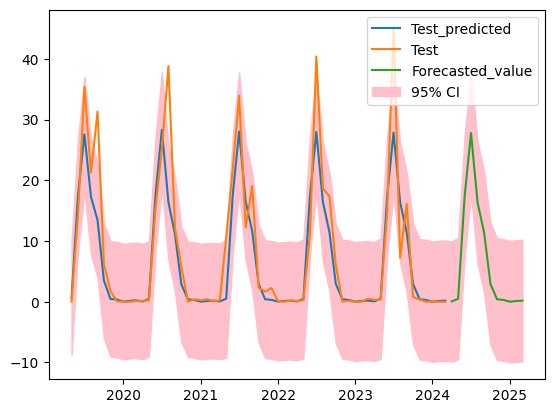

In [114]:
plt.plot(Test_pre_mum.iloc[:,0], label = "Test_predicted")
plt.plot(Test_mum["PRECTOTCORR"],label = "Test")
#plt.plot(Train_mum["PRECTOTCORR"], label = "Train")
plt.plot(Forecasted_val_mum.iloc[:,0], label = "Forecasted_value")
plt.fill_between(forecast_cis_r.index, forecast_cis_r.iloc[:, 0], forecast_cis_r.iloc[:, 1], color='pink',label = "95% CI")
plt.legend()
plt.show()

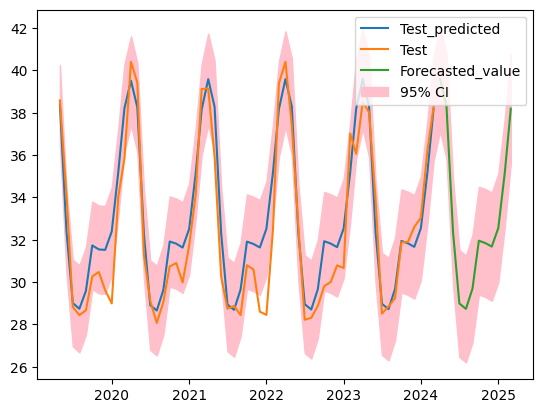

In [117]:
plt.plot(Test_pre_mum.iloc[:,2], label = "Test_predicted")
plt.plot(Test_mum["T2M"],label = "Test")
#plt.plot(Train_mum["T2M"], label = "Train")
plt.plot(Forecasted_val_mum.iloc[:,2], label = "Forecasted_value")
plt.fill_between(forecast_cis_t.index, forecast_cis_t.iloc[:, 0], forecast_cis_t.iloc[:, 1], color='pink',label = "95% CI")
plt.legend()
plt.show()

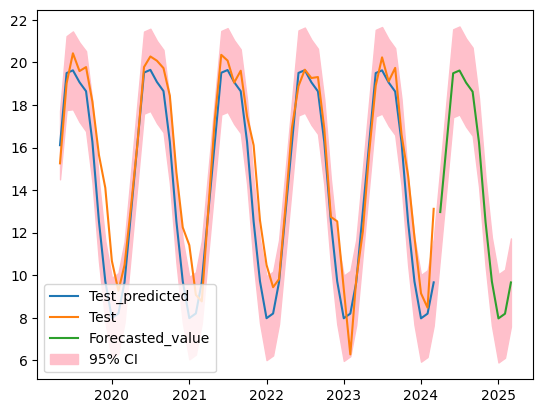

In [118]:
plt.plot(Test_pre_mum.iloc[:,1], label = "Test_predicted")
plt.plot(Test_mum["QV2M"],label = "Test")
#plt.plot(Train_mum["QV2M"], label = "Train")
plt.plot(Forecasted_val_mum.iloc[:,1], label = "Forecasted_value")
plt.fill_between(forecast_cis_q.index, forecast_cis_q.iloc[:, 0], forecast_cis_q.iloc[:, 1], color='pink',label = "95% CI")
plt.legend()
plt.show()

In [93]:
Forecasted_val_mum

,0,1,2
2024-04-01,0.062804,12.968386,39.604618
2024-05-01,0.491764,16.177211,38.310495
2024-06-01,17.413847,19.494950,32.358371
2024-07-01,27.782957,19.623436,28.985430
2024-08-01,16.330336,19.054470,28.732533
2024-09-01,11.384076,18.626728,29.691567
2024-10-01,2.941462,16.247283,31.953769
2024-11-01,0.408438,12.507547,31.840629
2024-12-01,0.305512,9.701564,31.673823
2025-01-01,0.018743,7.968056,32.555165


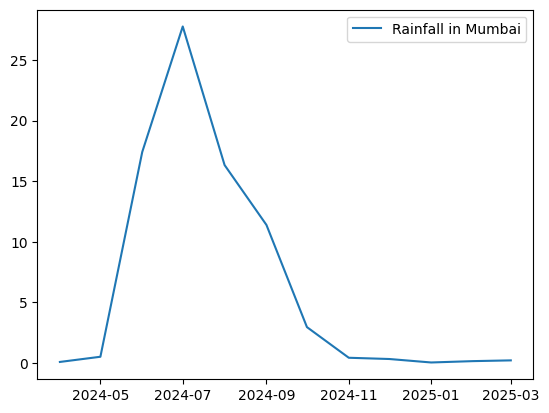

In [94]:
plt.plot(Forecasted_val_mum.iloc[:,0], label = "Rainfall in Mumbai")
plt.legend()
plt.show()

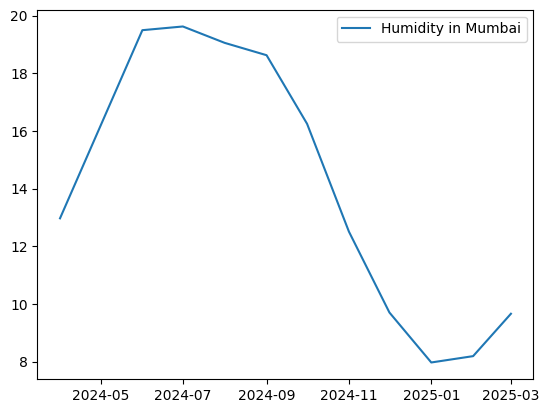

In [96]:
plt.plot(Forecasted_val_mum.iloc[:,1], label = "Humidity in Mumbai")
plt.legend()
plt.show()

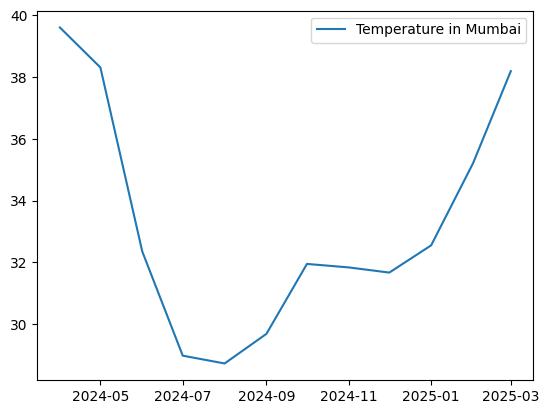

In [97]:
plt.plot(Forecasted_val_mum.iloc[:,2], label = "Temperature in Mumbai")
plt.legend()
plt.show()

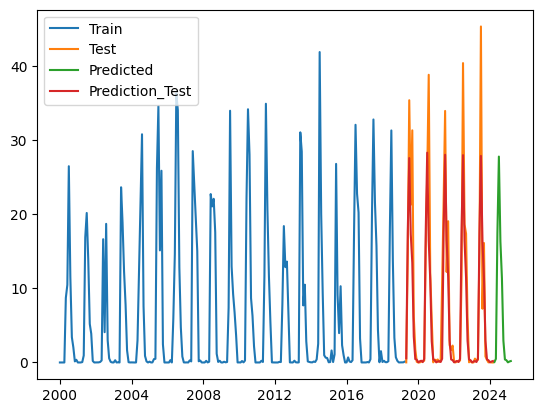

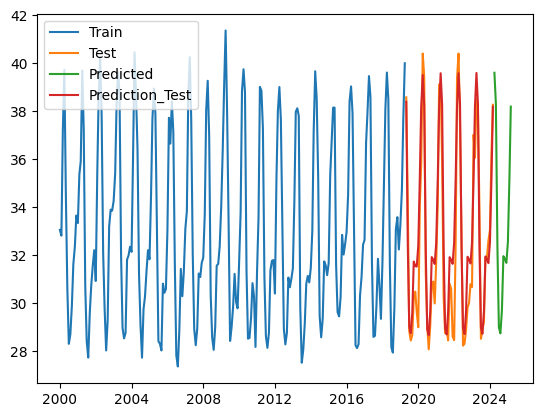

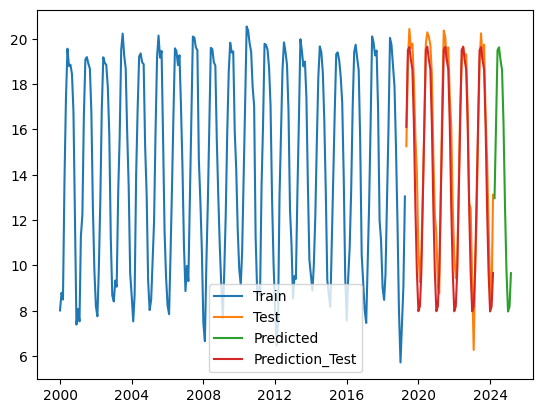

In [98]:
predict_plot(Train_mum["PRECTOTCORR"], Test_mum["PRECTOTCORR"],Forecasted_val_mum.iloc[:,0],Test_pre_mum.iloc[:,0])
predict_plot(Train_mum["T2M"], Test_mum["T2M"],Forecasted_val_mum.iloc[:,2],Test_pre_mum.iloc[:,2])
predict_plot(Train_mum["QV2M"], Test_mum["QV2M"],Forecasted_val_mum.iloc[:,1],Test_pre_mum.iloc[:,1])

In [125]:
combined_df = pd.concat([forecast_means_r,forecast_cis_r, forecast_means_q,forecast_cis_q, forecast_means_t,forecast_cis_t], axis=1, ignore_index=True)
pre_mum_out = combined_df.tail(12)
pre_mum_out.to_csv("D:/Project/My_Dataset/mum_out.csv")

<Axes: >

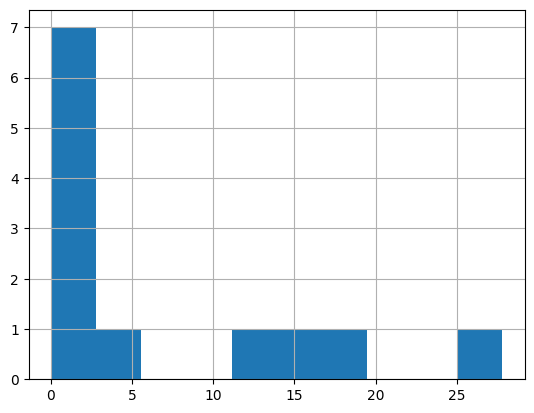

In [99]:
Forecasted_val_mum.iloc[:,0].hist()

<Axes: >

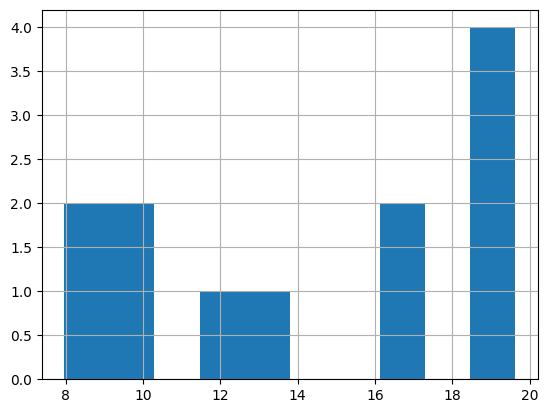

In [100]:
Forecasted_val_mum.iloc[:,1].hist()

<Axes: >

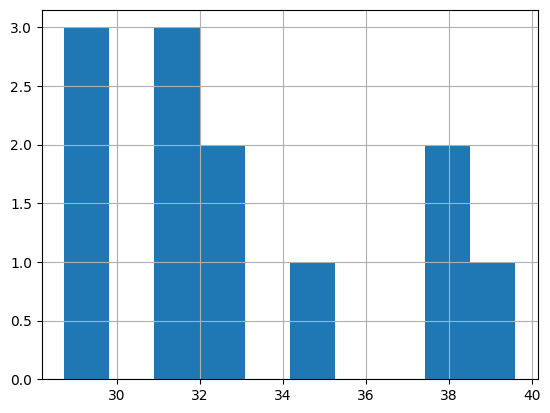

In [101]:
Forecasted_val_mum.iloc[:,2].hist()

In [104]:
shapiro_statistics,shapiro_pval = shapiro(pre_ahm.iloc[:,0])
print("Statistics:",shapiro_statistics,"P-value:",shapiro_pval)

Statistics: 0.6677727699279785 P-value: 0.0004195769433863461


In [105]:
shapiro_statistics,shapiro_pval = shapiro(pre_ahm.iloc[:,1])
print("Statistics:",shapiro_statistics,"P-value:",shapiro_pval)

Statistics: 0.8684731721878052 P-value: 0.06250244379043579


In [106]:
shapiro_statistics,shapiro_pval = shapiro(pre_ahm.iloc[:,2])
print("Statistics:",shapiro_statistics,"P-value:",shapiro_pval)

Statistics: 0.9028286337852478 P-value: 0.1725236177444458


In [107]:
shapiro_statistics,shapiro_pval = shapiro(Forecasted_val_mum.iloc[:,0])
print("Statistics:",shapiro_statistics,"P-value:",shapiro_pval)

Statistics: 0.7320898771286011 P-value: 0.0017484513809904456


In [108]:
shapiro_statistics,shapiro_pval = shapiro(Forecasted_val_mum.iloc[:,1])
print("Statistics:",shapiro_statistics,"P-value:",shapiro_pval)

Statistics: 0.8814772963523865 P-value: 0.09155246615409851


In [109]:
shapiro_statistics,shapiro_pval = shapiro(Forecasted_val_mum.iloc[:,2])
print("Statistics:",shapiro_statistics,"P-value:",shapiro_pval)

Statistics: 0.8930442333221436 P-value: 0.1289915144443512


In [117]:
A,b = mannwhitneyu(pre_ahm.iloc[:,0],Forecasted_val_mum.iloc[:,0])
print("Statistics:",A,"P-value:",b)

Statistics: 45.0 P-value: 0.12602212177037309


In [122]:
A,b = mannwhitneyu(pre_ahm.iloc[:,1],Forecasted_val_mum.iloc[:,1])
print("Statistics:",A,"P-value:",b)

Statistics: 41.0 P-value: 0.07825222852623705


In [123]:
A,b = mannwhitneyu(pre_ahm.iloc[:,2],Forecasted_val_mum.iloc[:,2])
print("Statistics:",A,"P-value:",b)

Statistics: 94.0 P-value: 0.21449380778351745
